In [237]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Lending Club Case Study**

Lending company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment.

Importing important libraries to work

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

loading dataset after going through data dictionary

In [239]:
loan_df = pd.read_csv("/content/drive/MyDrive/UpGrad/Graded /Assignement/Assignement1/loan.csv")

<ipython-input-239-1ac9789d0816>:1: DtypeWarning:

Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.



In [240]:
loan_df.shape

(39717, 111)

111 columns are present, lets dive deep into each columns

In [241]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Preprocessing

1) Remove column with all null values

In [242]:
loan_df=loan_df.drop(loan_df.columns[loan_df.isnull().all()],axis=1)

In [243]:
loan_df.shape

(39717, 57)

In [244]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

2) Remove Unwanted Column which are not necessary for this use case study by analysing data dictionary, they might get utilised to understand customer behaviour

In [245]:
cust_behaviour_col = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','title','emp_title','pub_rec_bankruptcies','revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','collections_12_mths_ex_med','mths_since_last_delinq','mths_since_last_record','initial_list_status','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']

In [246]:
loan_df= loan_df.drop(cust_behaviour_col, axis=1)

3) Removing more unwanted column as they are having unqiue row value or having same value for all the rows

In [247]:
unwanted_col = ['id','member_id','url','desc','zip_code', 'pymnt_plan','next_pymnt_d','policy_code']

In [248]:
loan_df=loan_df.drop(unwanted_col,axis=1)

In [249]:
loan_df.shape

(39717, 21)

**Column Preprocessing Result:** After cleaning the column, now we are left with only 21 column, we will use these column for further analysis

**Row Wise Data Cleaning**

4) Remove Loan status "current" rows from the dataset as there is uncertainity involved w.r.t these rows

In [250]:
loan_df = loan_df[~(loan_df['loan_status']=='Current')]

In [251]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null 

**Handle Missing Value**

Check Missing value percentage

In [252]:
(loan_df.isna().sum()/len(loan_df.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

5) Fix missing value for emp_lenght

In [253]:
loan_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [254]:
round(len(loan_df[loan_df.emp_length=='10+ years'])/len(loan_df.emp_length),2)

0.22

Replace missing value with 10+ years for emp length as 10+ years is most occuring value in emp lenght

In [255]:
loan_df.emp_length.fillna('10+ years', inplace=True)

6) Fix missing value for rovol_util

In [256]:
loan_df.revol_util.value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

Replace missing value with 0% for revol util as 0% years is most frequent value in revol_util

In [257]:
loan_df.revol_util.mode()

0    0%
Name: revol_util, dtype: object

In [258]:
loan_df.revol_util.fillna('0%', inplace=True)

**Standarize column values**

7) Standarize emp_length column by removing unwanted charaters for quantitative analysis

In [259]:
loan_df.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [260]:
loan_df['emp_length']=loan_df['emp_length'].str.replace('years','')
loan_df['emp_length']=loan_df['emp_length'].str.replace('year','')
loan_df['emp_length']=loan_df['emp_length'].str.replace('< 1','0')
loan_df['emp_length']=loan_df['emp_length'].str.replace('+','')
loan_df['emp_length']=loan_df['emp_length'].astype(int)


8) Standarize int_rate column by removing unwanted charaters for quantitative analysis

In [261]:
loan_df.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [262]:
loan_df.int_rate=loan_df.int_rate.str.replace('%','')
loan_df.int_rate=loan_df.int_rate.astype(float)

**Outlier Detection**

In [263]:
# Create a box plot
fig = go.Figure(data=[go.Box(y=loan_df['loan_amnt'])])
fig.update_layout(title_text='Loan Amount')

# Show the plot
fig.show()

In [264]:
# Create a box plot
fig = go.Figure(data=[go.Box(y=loan_df['funded_amnt'])])
fig.update_layout(title_text='funded Amount')

# Show the plot
fig.show()

In [265]:
# Create a box plot
fig = go.Figure(data=[go.Box(y=loan_df['funded_amnt_inv'])])
fig.update_layout(title_text='Funded Amount Investor')

# Show the plot
fig.show()

In [266]:
# Create a box plot
fig = go.Figure(data=[go.Box(y=loan_df['installment'])])
fig.update_layout(title_text='installment')

# Show the plot
fig.show()

In [267]:
# Create a box plot
fig = go.Figure(data=[go.Box(y=loan_df['annual_inc'])])
fig.update_layout(title_text='annual income')

# Show the plot
fig.show()

9) Detected Outlier in Annual Income and trimming it till 92 percentile for better analysis

In [268]:
loan_df.annual_inc.quantile([0.10,0.25,0.50,0.75,0.80,0.90,0.92,0.95,0.96,0.98,0.99,1])

0.10      30000.0
0.25      40000.0
0.50      58868.0
0.75      82000.0
0.80      90000.0
0.90     115000.0
0.92     122000.0
0.95     140004.0
0.96     150000.0
0.98     187000.0
0.99     234144.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [269]:
loan_amnt_quantile_92= loan_df.annual_inc.quantile(0.92)

In [270]:
loan_df= loan_df[loan_df.annual_inc<loan_amnt_quantile_92]

In [271]:
# Create a box plot
fig = go.Figure(data=[go.Box(y=loan_df['annual_inc'])])
fig.update_layout(title_text='annual income')

# Show the plot
fig.show()

In [272]:
# Create a box plot
fig = go.Figure(data=[go.Box(y=loan_df['int_rate'])])
fig.update_layout(title_text='int_rate')

# Show the plot
fig.show()

In [273]:
# Create a box plot
fig = go.Figure(data=[go.Box(y=loan_df['dti'])])
fig.update_layout(title_text='dti')

# Show the plot
fig.show()

10) Feature engineering on loan issue date column

In [274]:
loan_df['issue_month']=loan_df['issue_d'].str.split('-').str.get(0)
loan_df['issue_year']='20'+loan_df['issue_d'].str.split('-').str.get(1)

In [275]:
loan_df.shape

(35469, 23)

# Data Preprocessing Summary
1) Removed column with all null values

2) Removed Unwanted Column which are not necessary for this use case study by analyzing data dictionary, they might get utilised to understand customer behaviour

3) Removed more unwanted column as they are having unqiue row value or having same value for all the rows

4) Removed Loan status "current" rows from the dataset as there is uncertainity involved w.r.t these rows

5) **Fixed missing value** for emp_lenght

6) **Fixed missing value** for rovol_util

7) **Standardized** emp_length column by removing unwanted characters for quantitative analysis

8) **Standardized int_rate column** by removing unwanted characters for quantitative analysis

9) **Detected Outlier** in Annual Income and trimming it till 92 percentile for better analysis

10) **Feature engineering** on loan issue date column

# Un-Ordered Categorical Data Analysis

In [198]:
char_off = loan_df[loan_df.loan_status=='Charged Off']
percentage_charged_off=round((len(char_off)/len(loan_df))*100,2)
print("percentage of charged off loan out of total: ", percentage_charged_off,"%")

percentage of charged off loan out of total:  14.89 %


In [199]:
fig = go.Figure(data=[go.Histogram(x=loan_df['loan_status'])])
fig.update_layout(title_text='loan status')
fig.show()

In [200]:

fig = go.Figure(data=[go.Histogram(x=loan_df['home_ownership'])])
fig.update_layout(title_text='home ownership')
fig.show()

In [201]:
fig = go.Figure(data=[go.Histogram(x=loan_df.verification_status)])
fig.update_layout(title_text='verification_status')
fig.show()

In [202]:
fig = go.Figure(data=[go.Histogram(x=loan_df.purpose)])
fig.update_layout(title_text='loan purpose')
fig.show()

In [203]:
fig = go.Figure(data=[go.Histogram(x=loan_df.addr_state)])
fig.update_layout(title_text='addr state')
fig.show()

**Ordered Categorical Data Analysis**

In [204]:
fig = go.Figure(data=[go.Histogram(x=loan_df.term)])
fig.update_layout(title_text='term')
fig.show()

In [205]:
sorted_grade = sorted(loan_df.grade)
fig = go.Figure(data=[go.Histogram(x=sorted_grade)])
fig.update_layout(title_text='Employee Grade')
fig.show()

In [206]:
sorted_sub_grade = sorted(loan_df.sub_grade)
fig = go.Figure(data=[go.Histogram(x=sorted_sub_grade)])
fig.update_layout(title_text='Sub Grade')
fig.show()

**Observation after analyzing categorical variable**

1) There are **14.89% percentage of charged off loan** out of total loan amount

2) Applicant living on "Rent" are more often to take loan in comparison to others

3) In most of cases the applicant employment details are not verfied  

4) There is very high number of loan application for debt consolidation pupose (around 17K)

5) There is very high number of loan application from 'CA' state (around 6K)

6) In most of cases the loan term is 36 month which is almost 3 times of 60 month tenure

7) Highest number of loan applicant belongs to job grade "B" (around 11K)

8) There is a decreasing trend in number of loan appliaction as the job group or sub job group increases


**Quantitative Data Analysis**

In [207]:
Quant_var = ['loan_amnt','funded_amnt','funded_amnt_inv','annual_inc','installment','int_rate','dti']

In [208]:
Quant_var_df = loan_df[Quant_var]
Quant_var_df.describe()

loan_amnt   funded_amnt  funded_amnt_inv     annual_inc  \
count  35469.000000  35469.000000     35469.000000   35469.000000   
mean   10501.241225  10264.854521      9726.215139   58515.976634   
std     6912.508021   6671.688298      6600.493363   25008.033721   
min      500.000000    500.000000         0.000000    4000.000000   
25%     5000.000000   5000.000000      4950.000000   40000.000000   
50%     9000.000000   9000.000000      8000.000000   55000.000000   
75%    14500.000000  14000.000000     13151.204290   75000.000000   
max    35000.000000  35000.000000     35000.000000  121900.000000   

        installment      int_rate           dti  
count  35469.000000  35469.000000  35469.000000  
mean     306.756031     11.868438     13.500437  
std      195.029213      3.653510      6.672252  
min       15.690000      5.420000      0.000000  
25%      161.810000      8.940000      8.400000  
50%      265.710000     11.710000     13.670000  
75%      402.630000     14.270000     18.780000  
max     1305.190000     24.400000     29.990000

<Axes: >

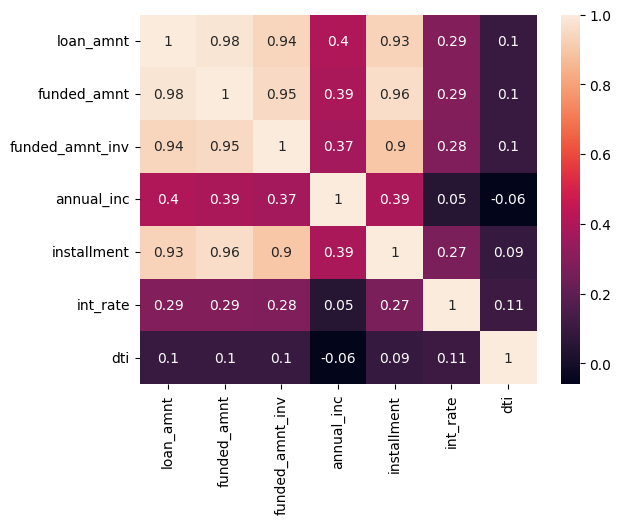

In [209]:
sns.heatmap(round(Quant_var_df.corr(),2), annot= True)

**segmented univariate analysis**

In [210]:
loan_df.groupby('term').mean()

loan_amnt   funded_amnt  funded_amnt_inv   int_rate  \
term                                                                 
 36 months   9129.708595   9015.869193      8414.446741  10.974605   
 60 months  14798.188068  14177.866465     13835.923471  14.668773   

            installment  emp_length    annual_inc        dti  open_acc  \
term                                                                     
 36 months   296.477810    4.816231  57384.846785  13.198107  9.001636   
 60 months   338.957208    5.662433  62059.752938  14.447622  9.439641   

             pub_rec  total_acc  
term                             
 36 months  0.055380  20.808420  
 60 months  0.063272  23.232114

In [211]:
loan_df.groupby('grade').mean()

loan_amnt   funded_amnt  funded_amnt_inv   int_rate  installment  \
grade                                                                        
A       8315.565231   8104.698686      7863.505152   7.328701   247.852575   
B      10438.867242  10210.448557      9686.084794  11.004303   304.834723   
C      10328.884599  10132.607197      9407.248239  13.529934   304.072326   
D      11566.371919  11384.608789     10700.776266  15.653901   345.360051   
E      14704.214929  14204.000429     13410.659980  17.584273   400.627632   
F      17131.183115  16633.055886     15856.565591  19.612556   469.578312   
G      18951.141079  18568.049793     17563.316262  21.227220   537.528340   

       emp_length    annual_inc        dti  open_acc   pub_rec  total_acc  
grade                                                                      
A        5.209851  58336.312295  12.313750  9.347687  0.015493  23.047548  
B        4.989795  57843.822984  13.617785  9.020967  0.057426  21.255868  
C        4.795809  57084.626377  14.079338  8.949262  0.081070  20.277127  
D        4.944695  58318.911329  14.104270  8.893462  0.081458  20.076099  
E        5.124839  62533.693222  14.332428  9.156585  0.081510  21.108108  
F        5.332937  67718.113734  14.456992  9.835910  0.102259  22.468490  
G        5.240664  71475.400456  13.839917  9.556017  0.099585  21.622407

In [212]:
loan_df.groupby('home_ownership').mean()

loan_amnt   funded_amnt  funded_amnt_inv   int_rate  \
home_ownership                                                           
MORTGAGE        11718.515962  11399.550445     10834.036357  11.536758   
NONE             5600.000000   5600.000000      1592.686667   8.696667   
OTHER           10605.277778  10088.611111      7396.225136  12.092889   
OWN              9648.709215   9469.935461      9033.909585  11.676264   
RENT             9616.690625   9441.748407      8920.984316  12.175673   

                installment  emp_length    annual_inc        dti   open_acc  \
home_ownership                                                                
MORTGAGE         332.312530    6.027883  67879.899465  13.410275  10.072872   
NONE             176.426667    1.666667  80733.333333  11.746667   7.000000   
OTHER            336.481556    3.755556  57959.377778  11.522778   8.555556   
OWN              283.862460    5.491574  50294.650936  13.436784   8.879527   
RENT             288.835233    4.111167  51969.789870  13.596242   8.338689   

                 pub_rec  total_acc  
home_ownership                       
MORTGAGE        0.067753  25.502627  
NONE            0.000000  12.666667  
OTHER           0.044444  21.044444  
OWN             0.052349  20.494442  
RENT            0.049383  18.101359

In [213]:
loan_df.groupby('verification_status').mean()

loan_amnt   funded_amnt  funded_amnt_inv   int_rate  \
verification_status                                                           
Not Verified          8197.306703   8077.694864      7379.200373  11.149700   
Source Verified       9385.182371   9204.905437      8985.212139  11.963116   
Verified             14886.502491  14428.231037     13862.898485  12.866716   

                     installment  emp_length    annual_inc        dti  \
verification_status                                                     
Not Verified          252.685232    4.828306  54844.769406  13.135249   
Source Verified       272.365019    4.653946  56519.132993  12.901862   
Verified              416.518451    5.616223  65686.077558  14.547601   

                     open_acc   pub_rec  total_acc  
verification_status                                 
Not Verified         8.922054  0.059949  20.744341  
Source Verified      8.766183  0.054374  20.084318  
Verified             9.670834  0.055738  23.464141

In [214]:
loan_df.groupby('purpose').mean()

loan_amnt   funded_amnt  funded_amnt_inv   int_rate  \
purpose                                                                      
car                  6534.419263   6481.940510      6277.229425  10.468194   
credit_card         11071.904814  10827.661535     10277.487680  11.546359   
debt_consolidation  12005.053033  11732.362055     11175.758701  12.324677   
educational          6604.838710   6480.725806      5379.700771  11.619484   
home_improvement    10157.255717   9897.588358      9363.323018  11.155871   
house               11612.962963  11297.222222     10736.783048  12.019722   
major_purchase       7588.596270   7434.501008      7135.027273  10.791487   
medical              7746.560000   7610.360000      7286.001496  11.425344   
moving               5827.376426   5728.422053      5482.124835  11.528365   
other                7549.324138   7397.227586      6905.644218  11.658157   
renewable_energy     8046.467391   7813.315217      7106.090525  11.336630   
small_business      12546.109325  12102.459807     10934.069110  12.814540   
vacation             5271.089385   5181.843575      4995.409517  10.779637   
wedding              9319.906868   9197.962747      8647.621549  11.717229   

                    installment  emp_length    annual_inc        dti  \
purpose                                                                
car                  183.865241    5.014164  55889.742649  11.154851   
credit_card          330.832912    4.958369  61004.775434  14.802860   
debt_consolidation   349.657697    5.085091  58507.881004  14.633525   
educational          210.825452    3.548387  46980.518000  11.213645   
home_improvement     286.626561    5.914761  65932.467094  11.559518   
house                334.504259    4.867284  60136.346173  11.005185   
major_purchase       221.886406    4.810988  55501.765277  10.993972   
medical              224.024720    5.212800  56132.025008  12.325728   
moving               173.603213    3.836502  50757.188574  11.867833   
other                225.024248    4.897655  54419.422905  12.389948   
renewable_energy     226.895543    6.086957  58700.767717  12.482500   
small_business       360.322360    4.644373  61556.253190  11.210624   
vacation             156.552654    5.882682  54654.764385  12.440587   
wedding              278.690501    4.002328  59236.668277  12.452724   

                    open_acc   pub_rec  total_acc  
purpose                                            
car                 8.449008  0.057365  20.263456  
credit_card         9.624458  0.057459  22.181700  
debt_consolidation  9.520200  0.058813  22.253128  
educational         8.780645  0.041935  18.090323  
home_improvement    9.193763  0.067775  23.216216  
house               8.299383  0.055556  20.388889  
major_purchase      8.063004  0.043851  19.155746  
medical             8.718400  0.091200  20.662400  
moving              7.903042  0.045627  17.903042  
other               8.224276  0.047724  19.281379  
renewable_energy    8.967391  0.076087  22.293478  
small_business      8.272669  0.060450  19.992283  
vacation            8.298883  0.092179  20.505587  
wedding             8.561118  0.034924  18.309662

In [215]:
loan_df.groupby('addr_state').mean().sort_values(by= 'loan_amnt',ascending=False)

loan_amnt   funded_amnt  funded_amnt_inv   int_rate  \
addr_state                                                           
AK          12072.857143  11782.142857     11092.844621  12.377429   
DC          11455.789474  11155.131579     10313.214153  11.816053   
IA          11290.000000  11290.000000      4816.424000   8.974000   
VA          10915.878107  10692.161187     10141.011237  12.101010   
NJ          10899.015009  10617.088806     10070.561360  12.088931   
CO          10889.889197  10625.138504     10002.711481  11.578684   
IL          10853.547915  10645.885150     10105.278651  11.928361   
NC          10826.633523  10554.971591      9983.689122  11.890611   
TX          10814.609572  10544.626364      9928.597400  11.853636   
OK          10786.080586  10545.970696     10110.066081  11.694652   
WI          10776.399027  10620.377129     10154.249281  11.795109   
MD          10755.234460  10538.304253      9971.781412  12.328571   
NH          10678.040541  10450.506757      9859.146836  11.560405   
AL          10639.492754  10355.434783      9939.520047  11.700290   
HI          10618.312102  10566.401274     10274.717077  12.441083   
NY          10588.760036  10361.738032      9786.272773  11.922058   
WY          10575.949367  10450.000000     10196.342668  12.437468   
CA          10561.556791  10332.347101      9820.410695  12.017080   
GA          10531.295108  10246.932638      9674.599507  11.671010   
CT          10525.154560  10294.783617      9932.945075  11.693138   
UT          10515.021008  10279.516807      9557.353758  11.880126   
MO          10500.350467  10280.140187      9878.256685  11.589034   
MI          10469.732824  10153.015267      9536.623568  11.765115   
NV          10431.052036  10204.411765      9691.443032  12.498914   
SC          10379.340278  10119.212963      9646.192041  11.661481   
WV          10376.785714  10294.494048     10132.119354  11.799762   
WA          10340.965834  10211.465177      9539.950566  12.108515   
OH          10309.959714  10130.013429      9547.297993  11.810806   
MA          10290.616911  10079.421915      9543.515061  11.539034   
KY          10274.915825  10117.929293      9745.365501  11.740774   
OR          10235.024155   9961.533816      9593.647294  11.819034   
AZ          10217.843511   9966.730280      9328.825570  12.073562   
KS          10149.261603  10020.358650      9392.747729  11.499958   
FL          10091.980769   9840.836538      9306.333595  11.804415   
MN          10008.057491   9682.229965      9201.149424  11.557091   
NM           9984.339080   9630.459770      8940.486700  11.591494   
PA           9953.224063   9738.148415      9377.721594  11.492579   
SD           9895.967742   9681.854839      9226.221157  11.374032   
AR           9871.973094   9676.233184      9292.537950  11.462063   
LA           9733.311856   9474.033505      9053.541271  11.458402   
MT           9723.765432   9554.320988      9156.022732  11.767654   
IN           9580.555556   8408.333333       825.060000  10.801111   
TN           9539.705882   7688.235294      3755.895753  10.561176   
DE           9511.320755   9399.056604      8681.081243  11.885000   
RI           9346.527778   9071.944444      8609.468906  11.725222   
VT           9286.274510   8994.117647      8301.344558  10.977255   
MS           7062.500000   6681.944444      4980.179447  11.692222   
ID           6950.000000   6950.000000      5410.000000  11.798000   
NE           6340.000000   6340.000000      1102.083932  11.814000   
ME           3066.666667   3066.666667      1033.333333  10.486667   

            installment  emp_length    annual_inc        dti   open_acc  \
addr_state                                                                
AK           351.778000    5.628571  63388.700571  15.132714   9.271429   
DC           340.952316    3.052632  69202.241895  12.714053   9.084211   
IA           360.858000    3.800000  50599.200000  12.910000  11.400000   

In [216]:
loan_df.groupby('loan_status').mean()

loan_amnt   funded_amnt  funded_amnt_inv   int_rate  \
loan_status                                                           
Charged Off  11661.551202  11340.398448     10485.530150  13.734946   
Fully Paid   10298.169681  10076.618300      9593.323692  11.541771   

             installment  emp_length    annual_inc        dti  open_acc  \
loan_status                                                               
Charged Off   323.744867    5.248722  54550.380952  14.137511  9.027257   
Fully Paid    303.782731    4.981117  59210.014996  13.388939  9.121679   

              pub_rec  total_acc  
loan_status                       
Charged Off  0.087261  20.914253  
Fully Paid   0.052044  21.478964

#**Observation after performing quantitative and segmented univariate analysis**

1) Heatmap clearly indicates the high correlation between loan amount, funded amount, funded amount investor & installment

2) There is a big gap between average loan amount requested for 36 month and 60 months tenure and same goes for other factors as well

3) It is clearly visible that average requsted loan amount increses with the job grade

4) Appliacnt whose home ownership is "mortgage" has highest average loan amount

5) Appliacnt whose verification status is "verified" has highest average loan amount

6) Appliacnt belongs to 'AK' state takes highest loan amount on an average

7) Appliacnt whose loan status is 'charged off' on an average takes more loan amount than Full Paid status

# Multivariet analysis

As we're searching the driving factor involved for **charged off loan**, we will deep dive into that specific rows to get more insights

<Axes: xlabel='home_ownership', ylabel='count'>

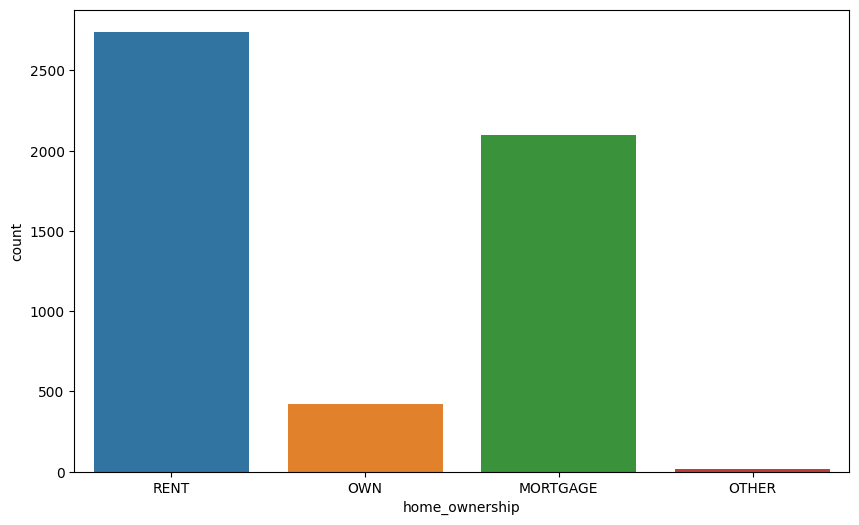

In [217]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='purpose', ylabel='count'>

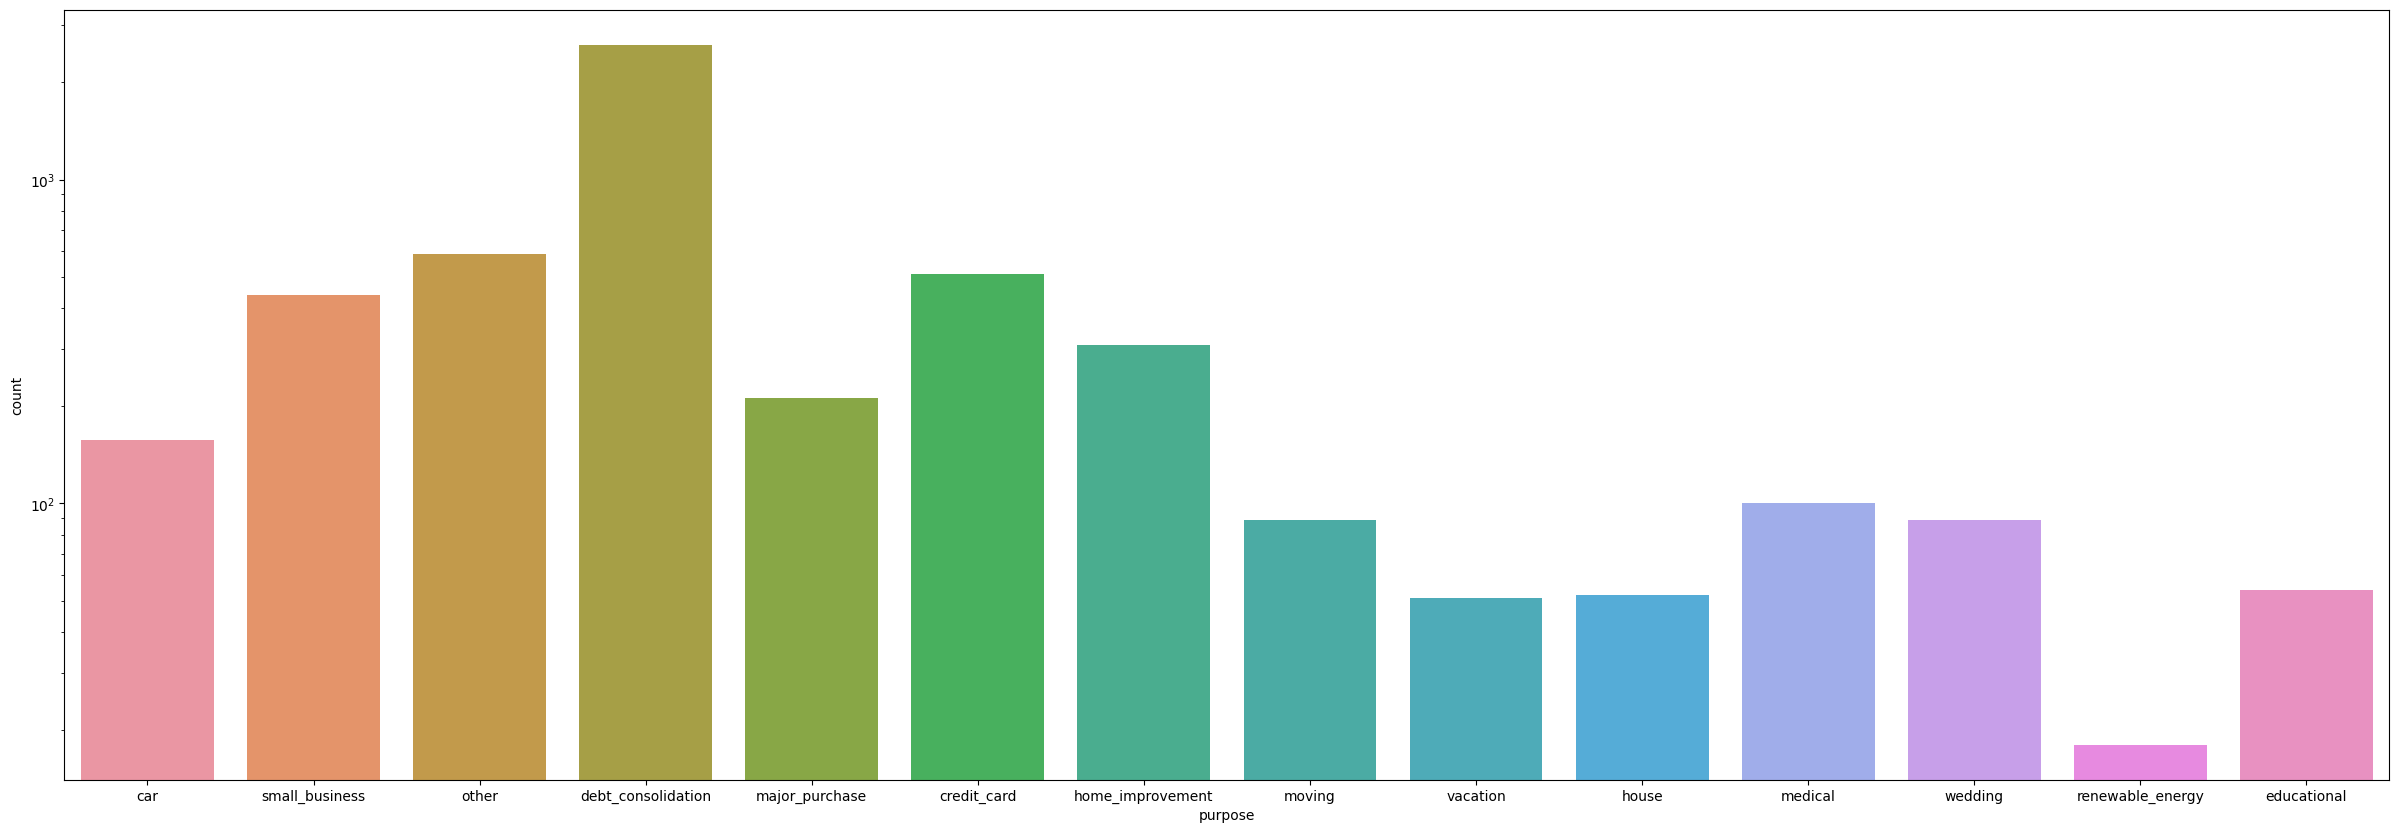

In [218]:
fig, ax = plt.subplots(figsize = (30,10))
ax.set(yscale = 'log')
sns.countplot(x='purpose', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='issue_month', ylabel='count'>

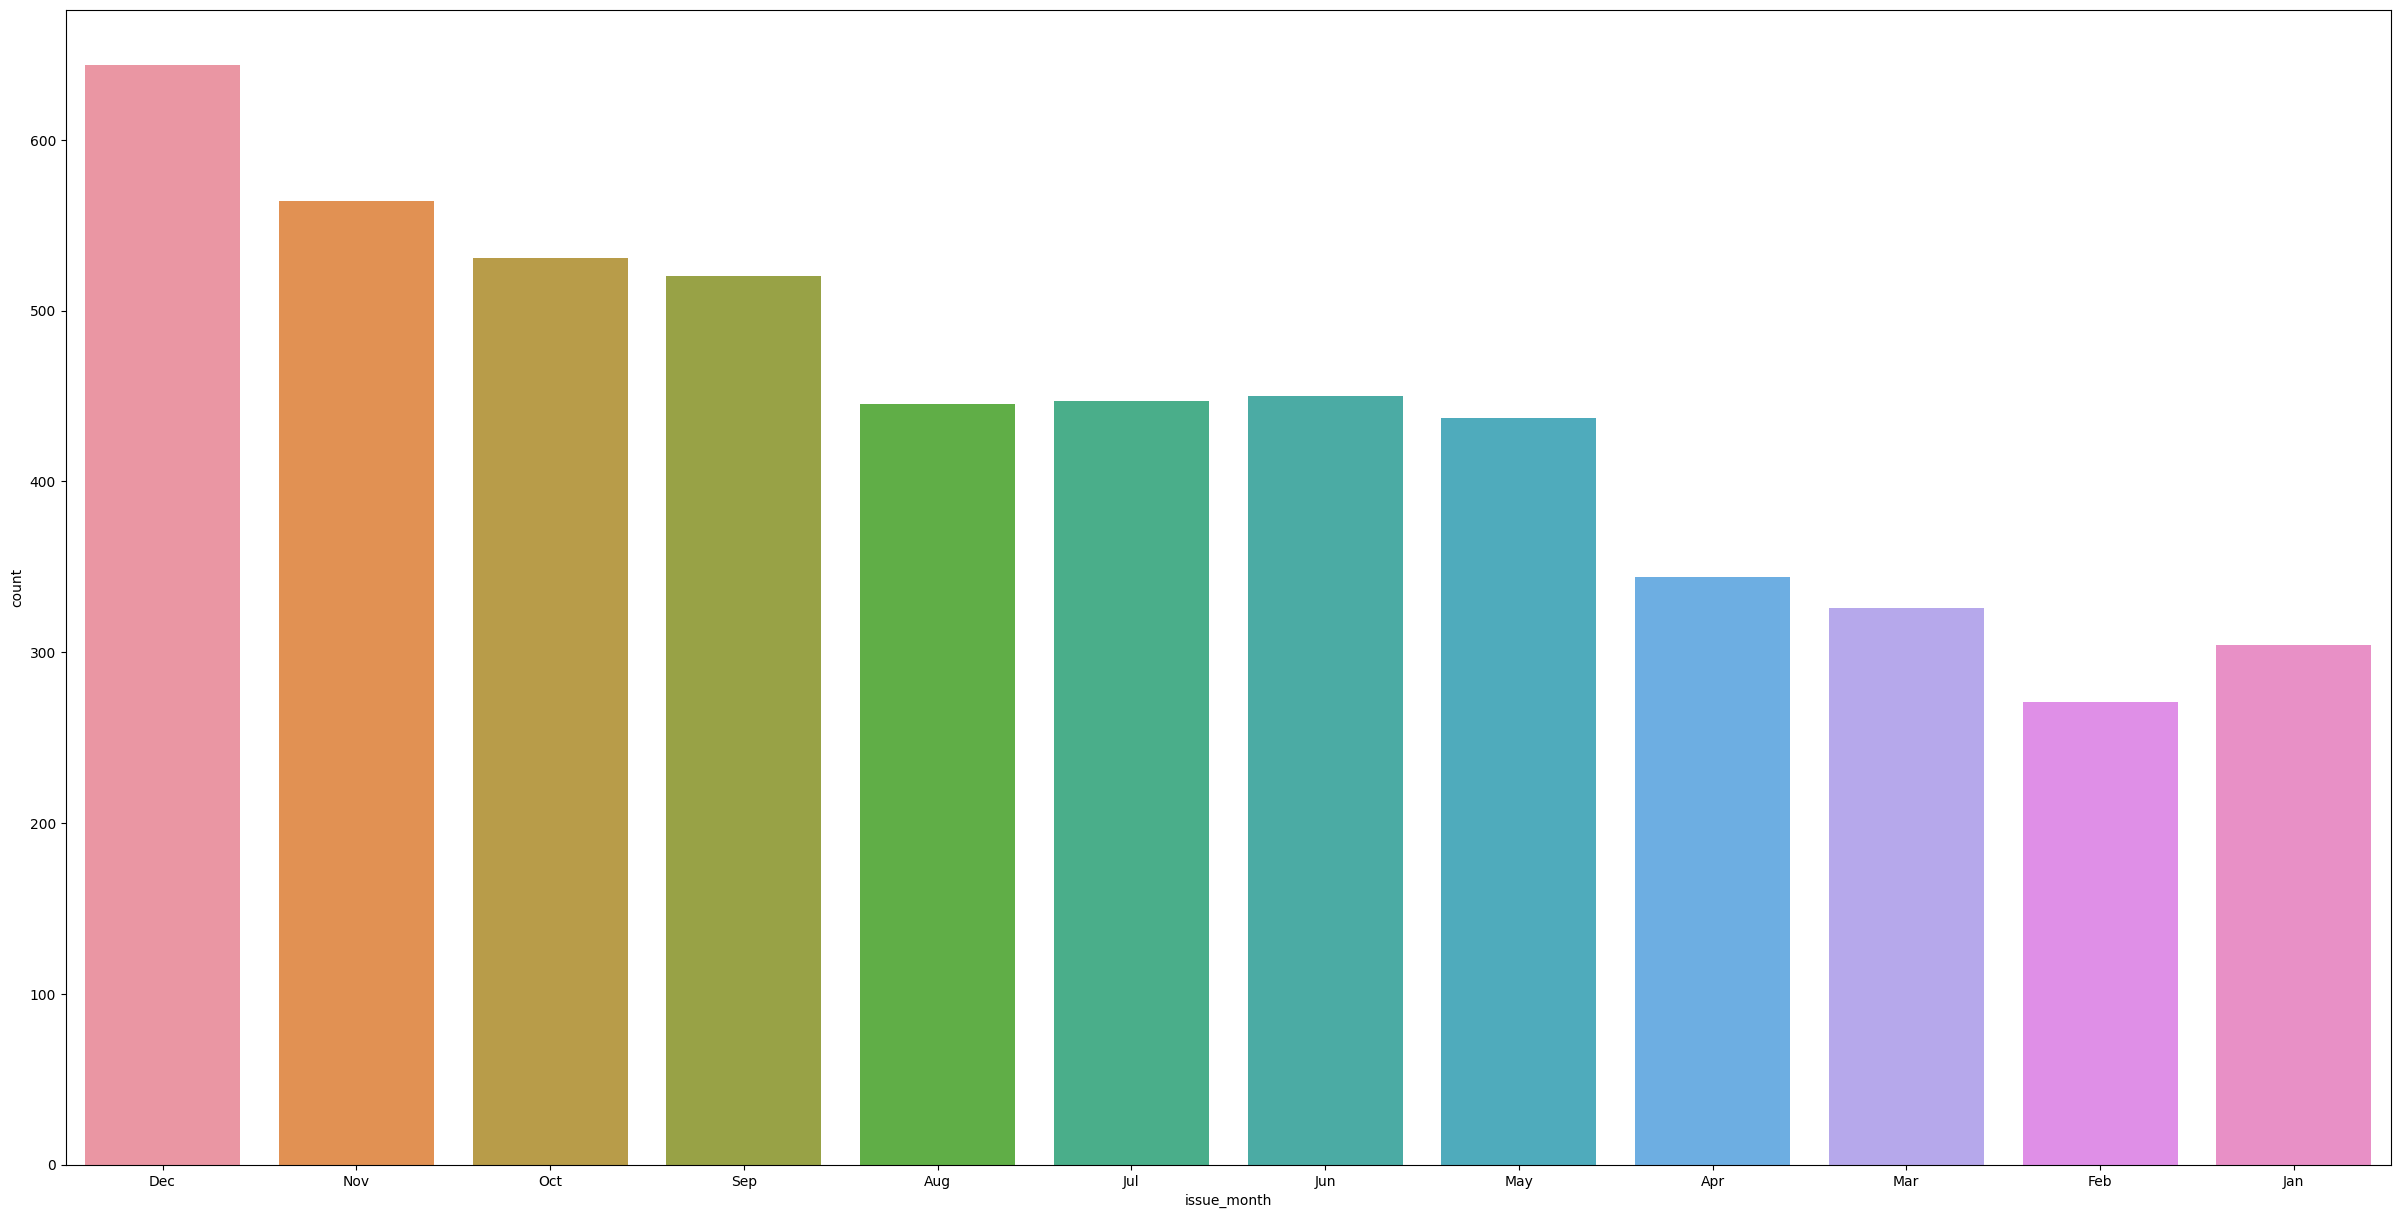

In [219]:
plt.figure(figsize=(30,15))
sns.countplot(x='issue_month', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='issue_year', ylabel='count'>

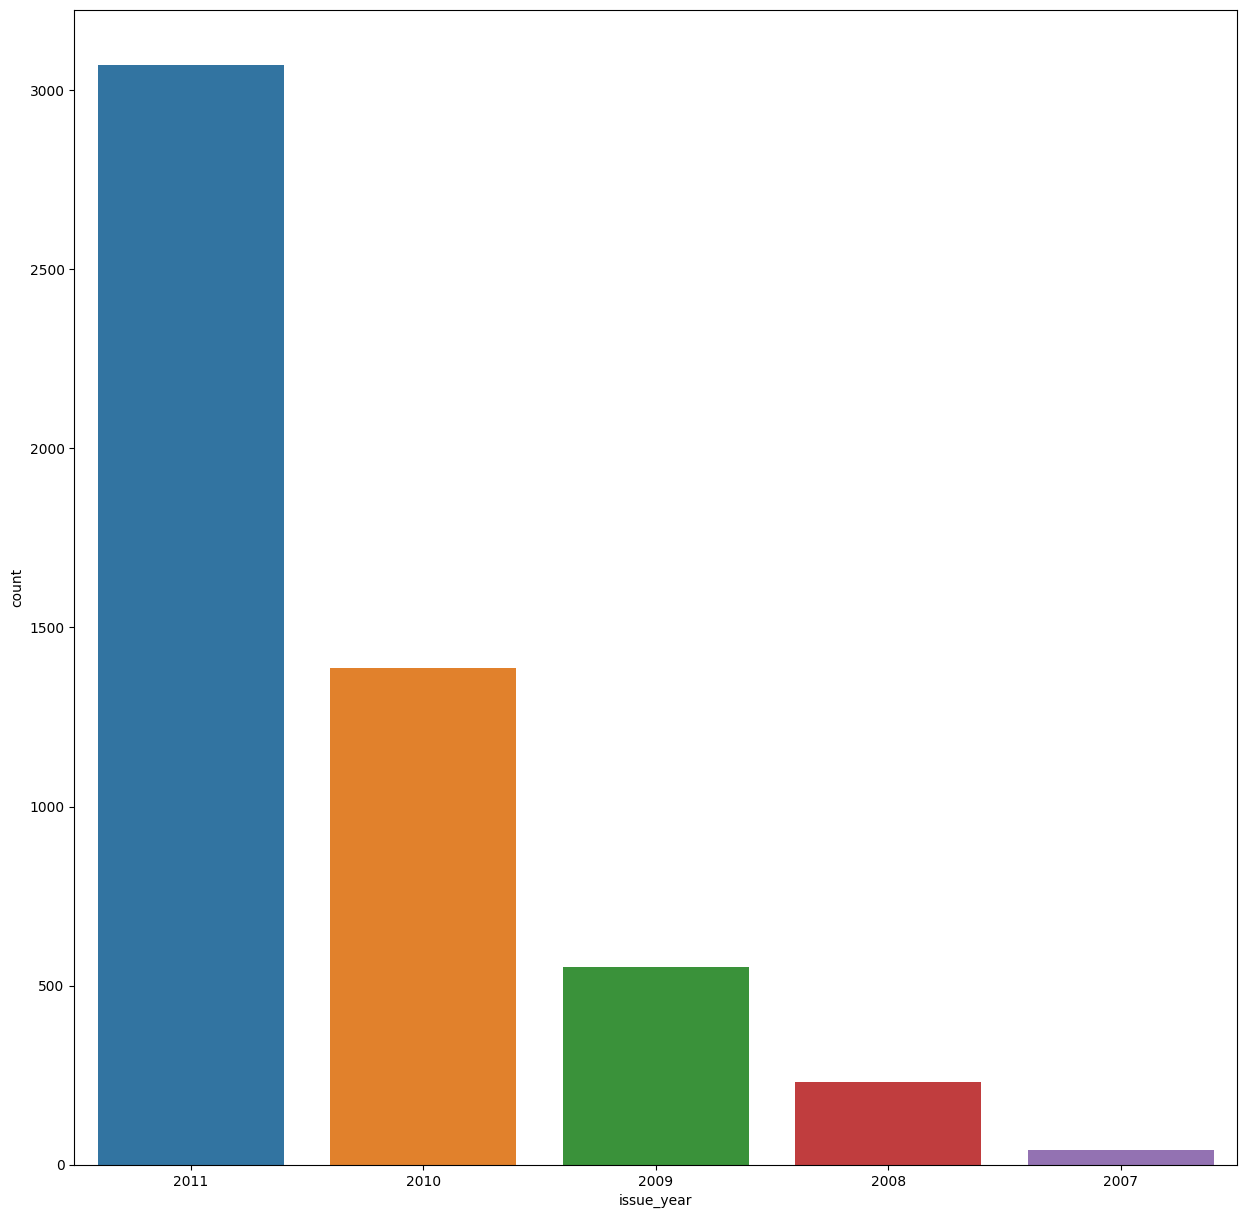

In [220]:
plt.figure(figsize=(15,15))
sns.countplot(x='issue_year', data=loan_df[loan_df['loan_status']=='Charged Off'])

**Implementing binning concept to convert quantitative column into categorical column**

In [221]:
loan_df['loan_amnt_grp'] = pd.cut(loan_df['loan_amnt'], 8)
loan_df['funded_amnt_grp'] = pd.cut(loan_df['funded_amnt'], 8)
loan_df['funded_amnt_inv_grp'] = pd.cut(loan_df['funded_amnt_inv'], 8)
loan_df['annual_inc_grp'] = pd.cut(loan_df['annual_inc'], 8)
loan_df['int_rate_grp'] = pd.cut(loan_df['int_rate'], 8)
loan_df['dti_grp'] = pd.cut(loan_df['dti'], 8)
loan_df['installment_grp'] = pd.cut(loan_df['installment'], 8)

<Axes: xlabel='loan_amnt_grp', ylabel='count'>

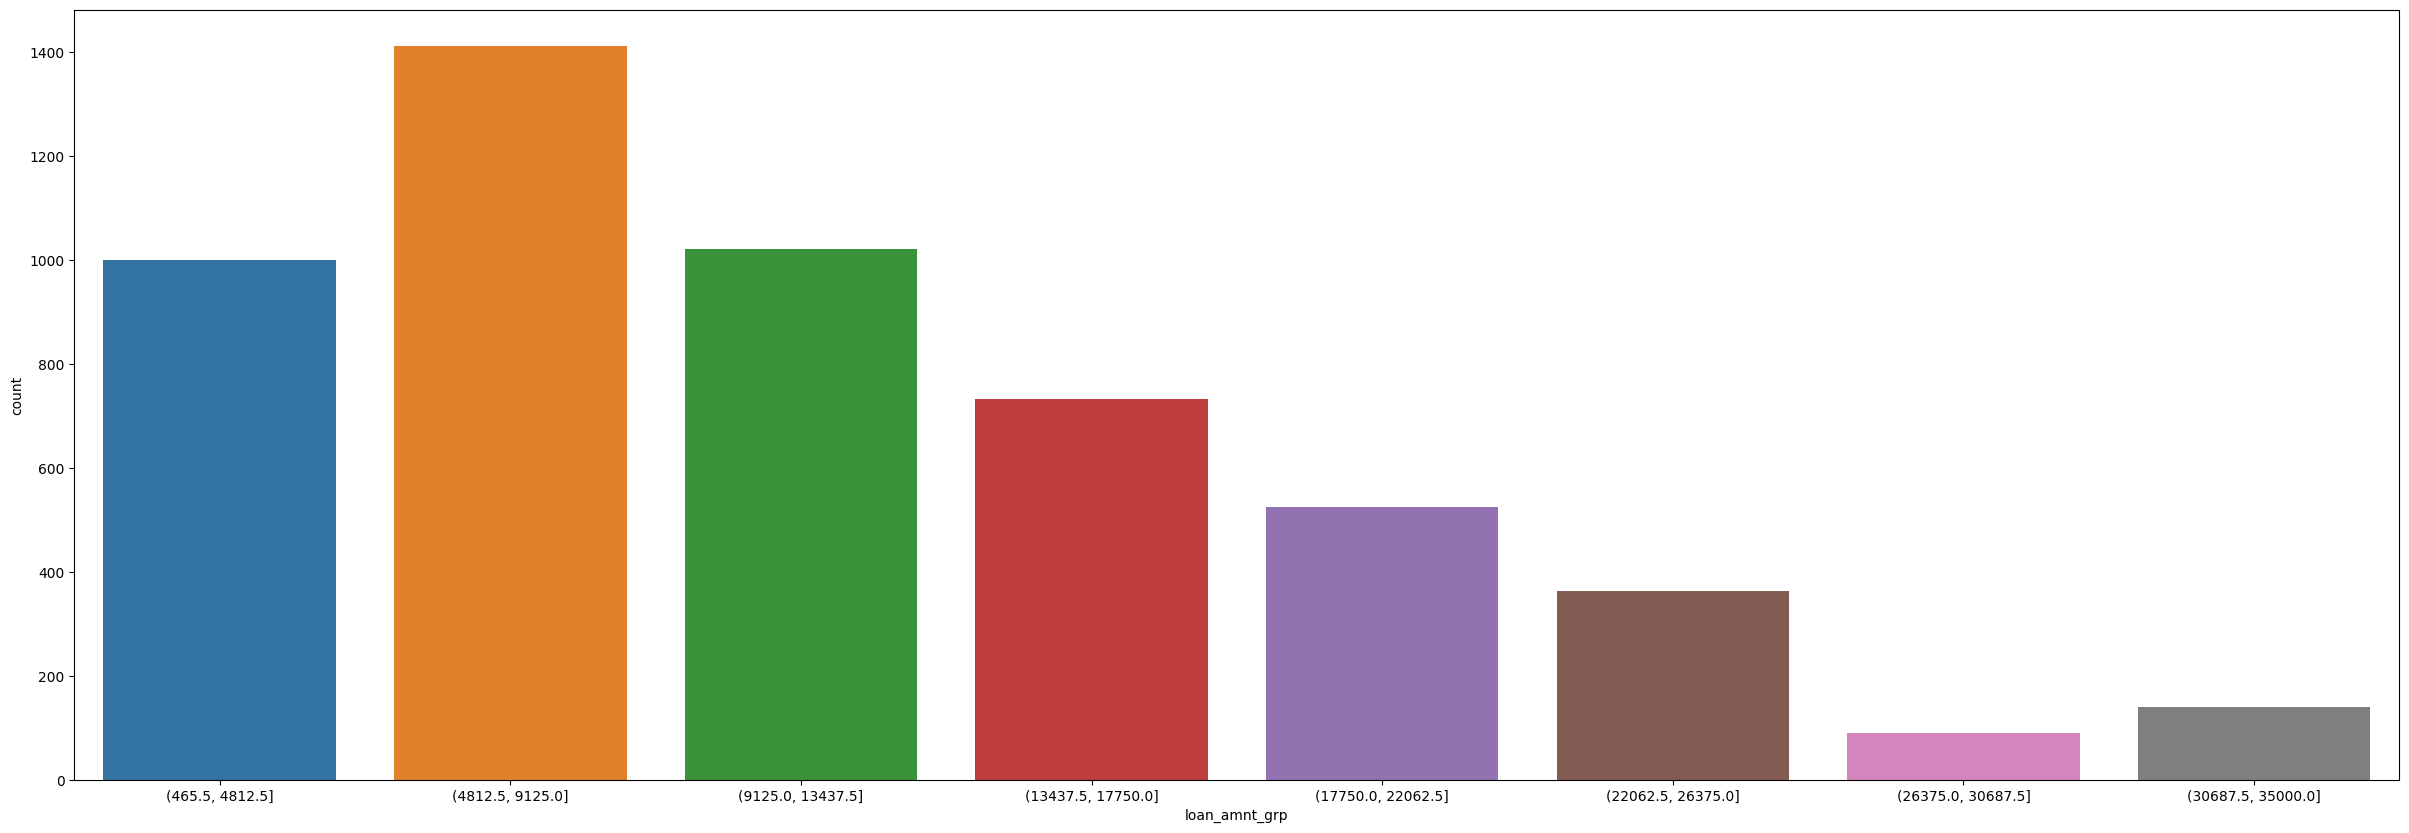

In [222]:
fig, ax = plt.subplots(figsize = (30,10))
sns.countplot(x='loan_amnt_grp', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='funded_amnt_grp', ylabel='count'>

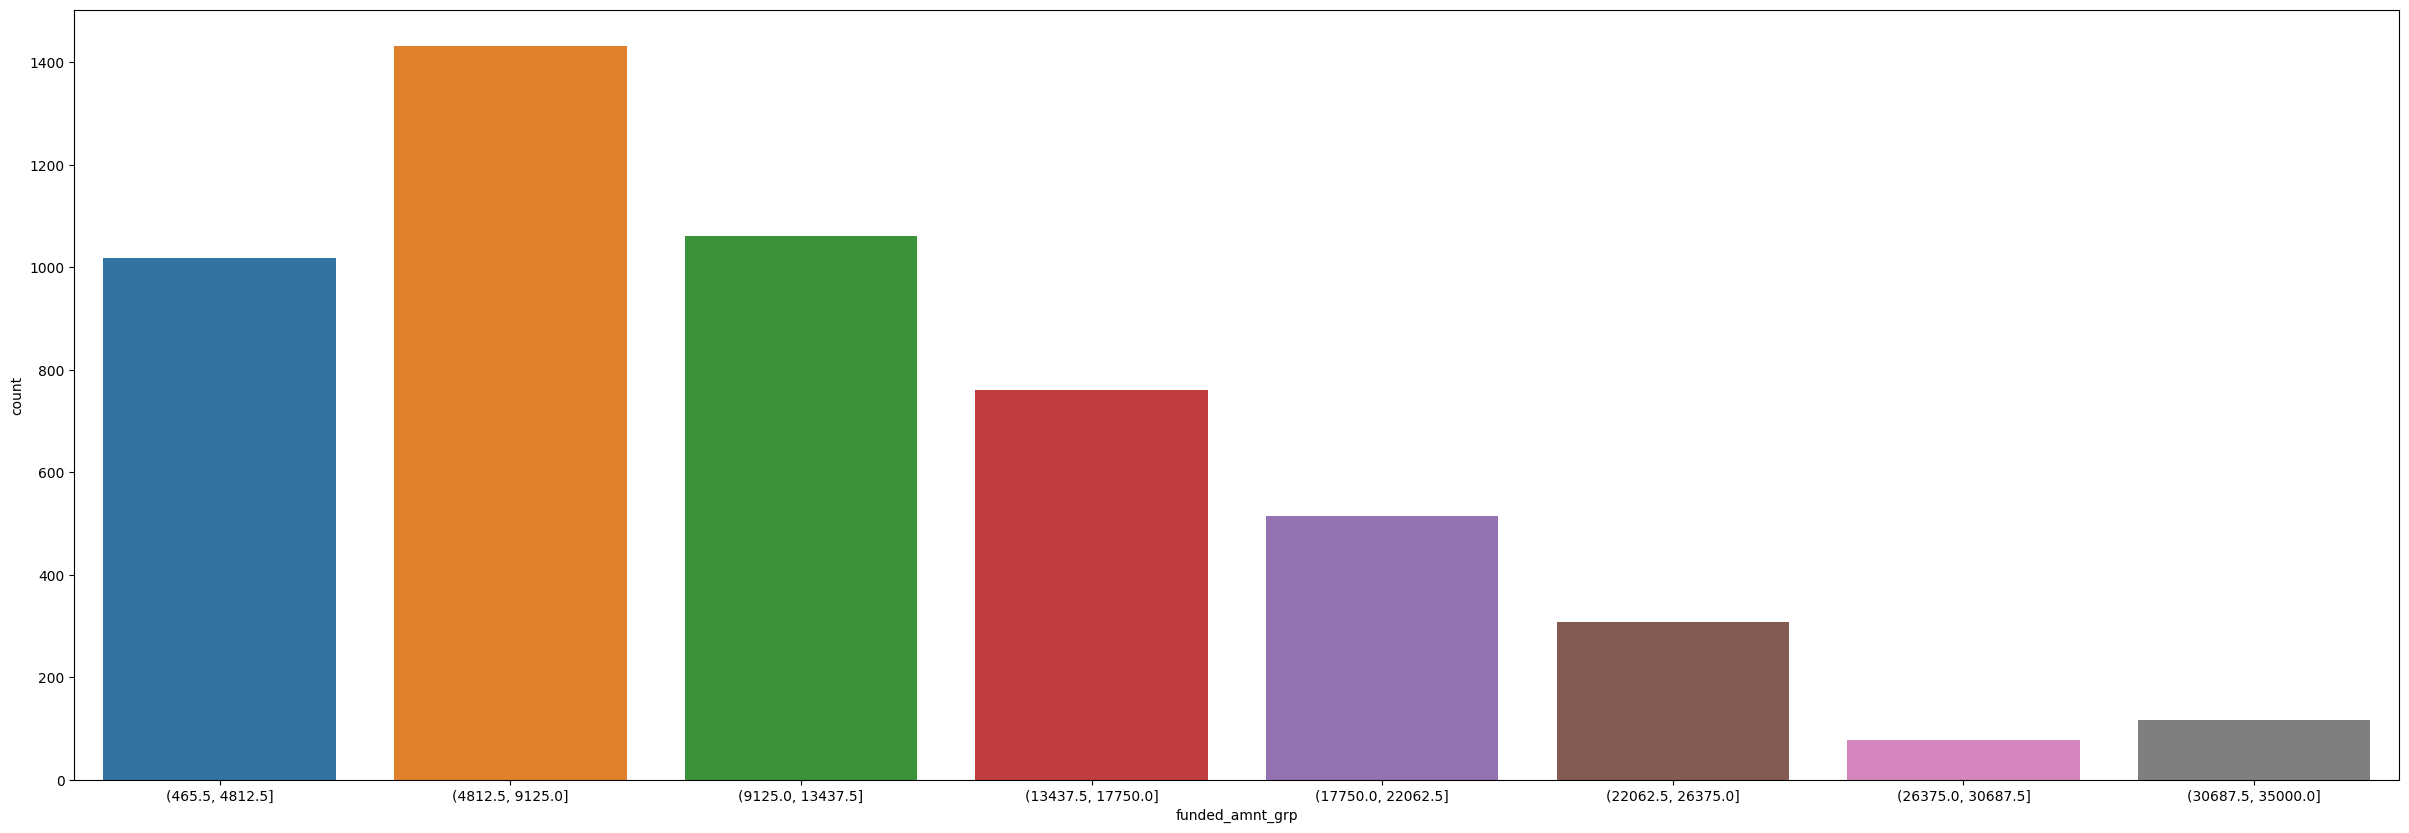

In [223]:
fig, ax = plt.subplots(figsize = (30,10))
sns.countplot(x='funded_amnt_grp', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='funded_amnt_inv_grp', ylabel='count'>

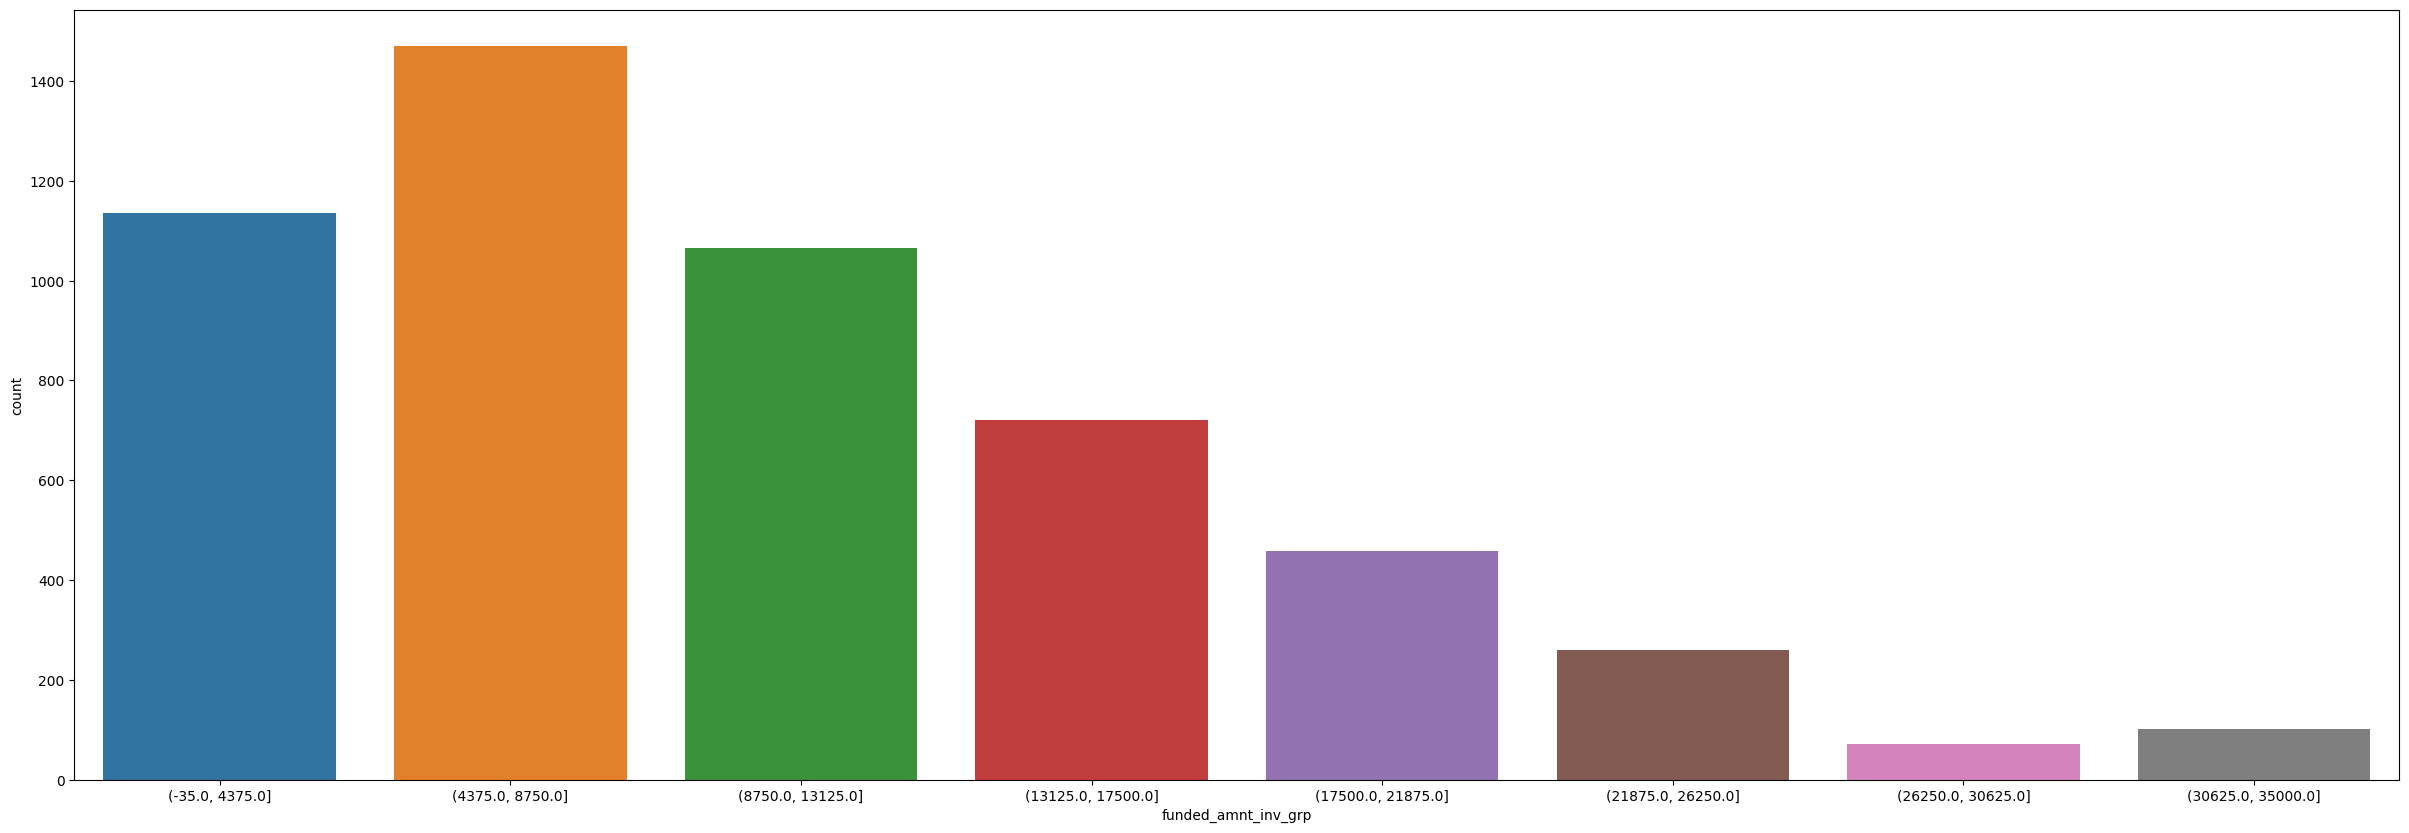

In [224]:
fig, ax = plt.subplots(figsize = (30,10))
sns.countplot(x='funded_amnt_inv_grp', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='installment_grp', ylabel='count'>

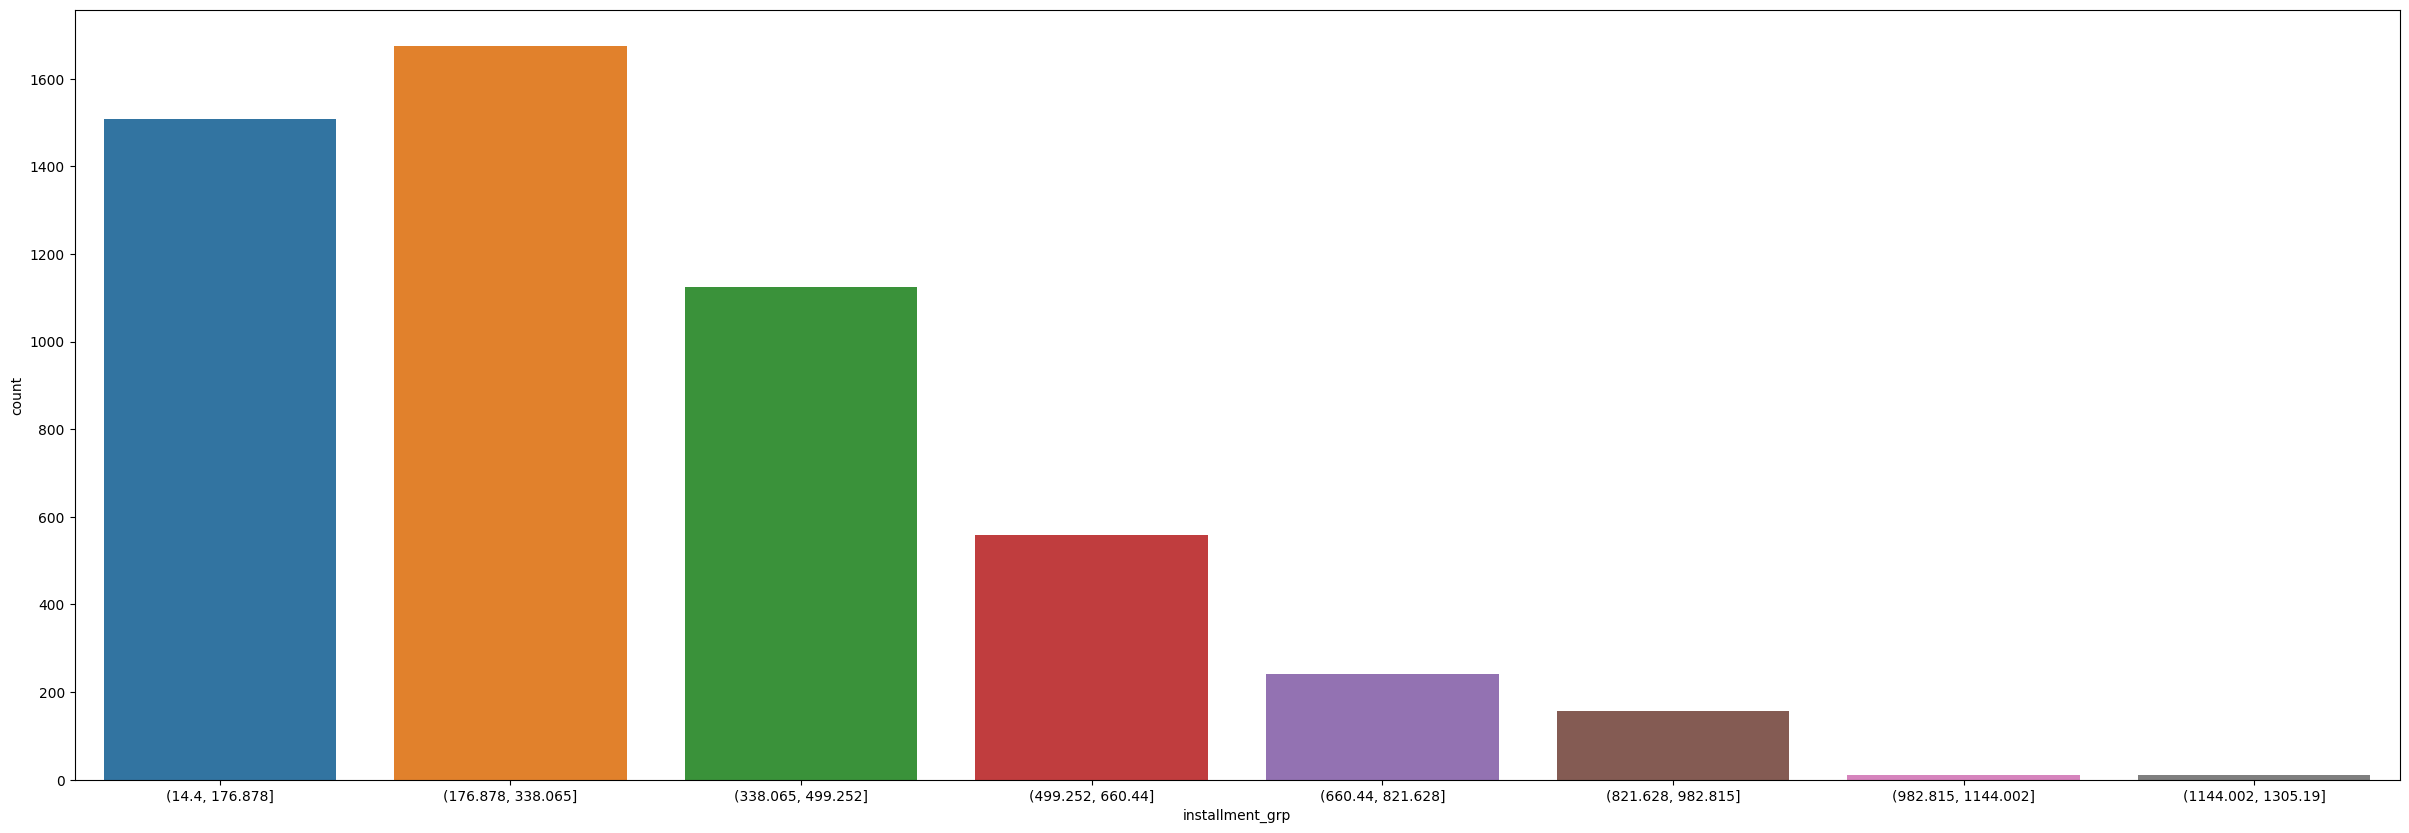

In [225]:
fig, ax = plt.subplots(figsize = (30,10))
sns.countplot(x='installment_grp', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_grp', ylabel='count'>

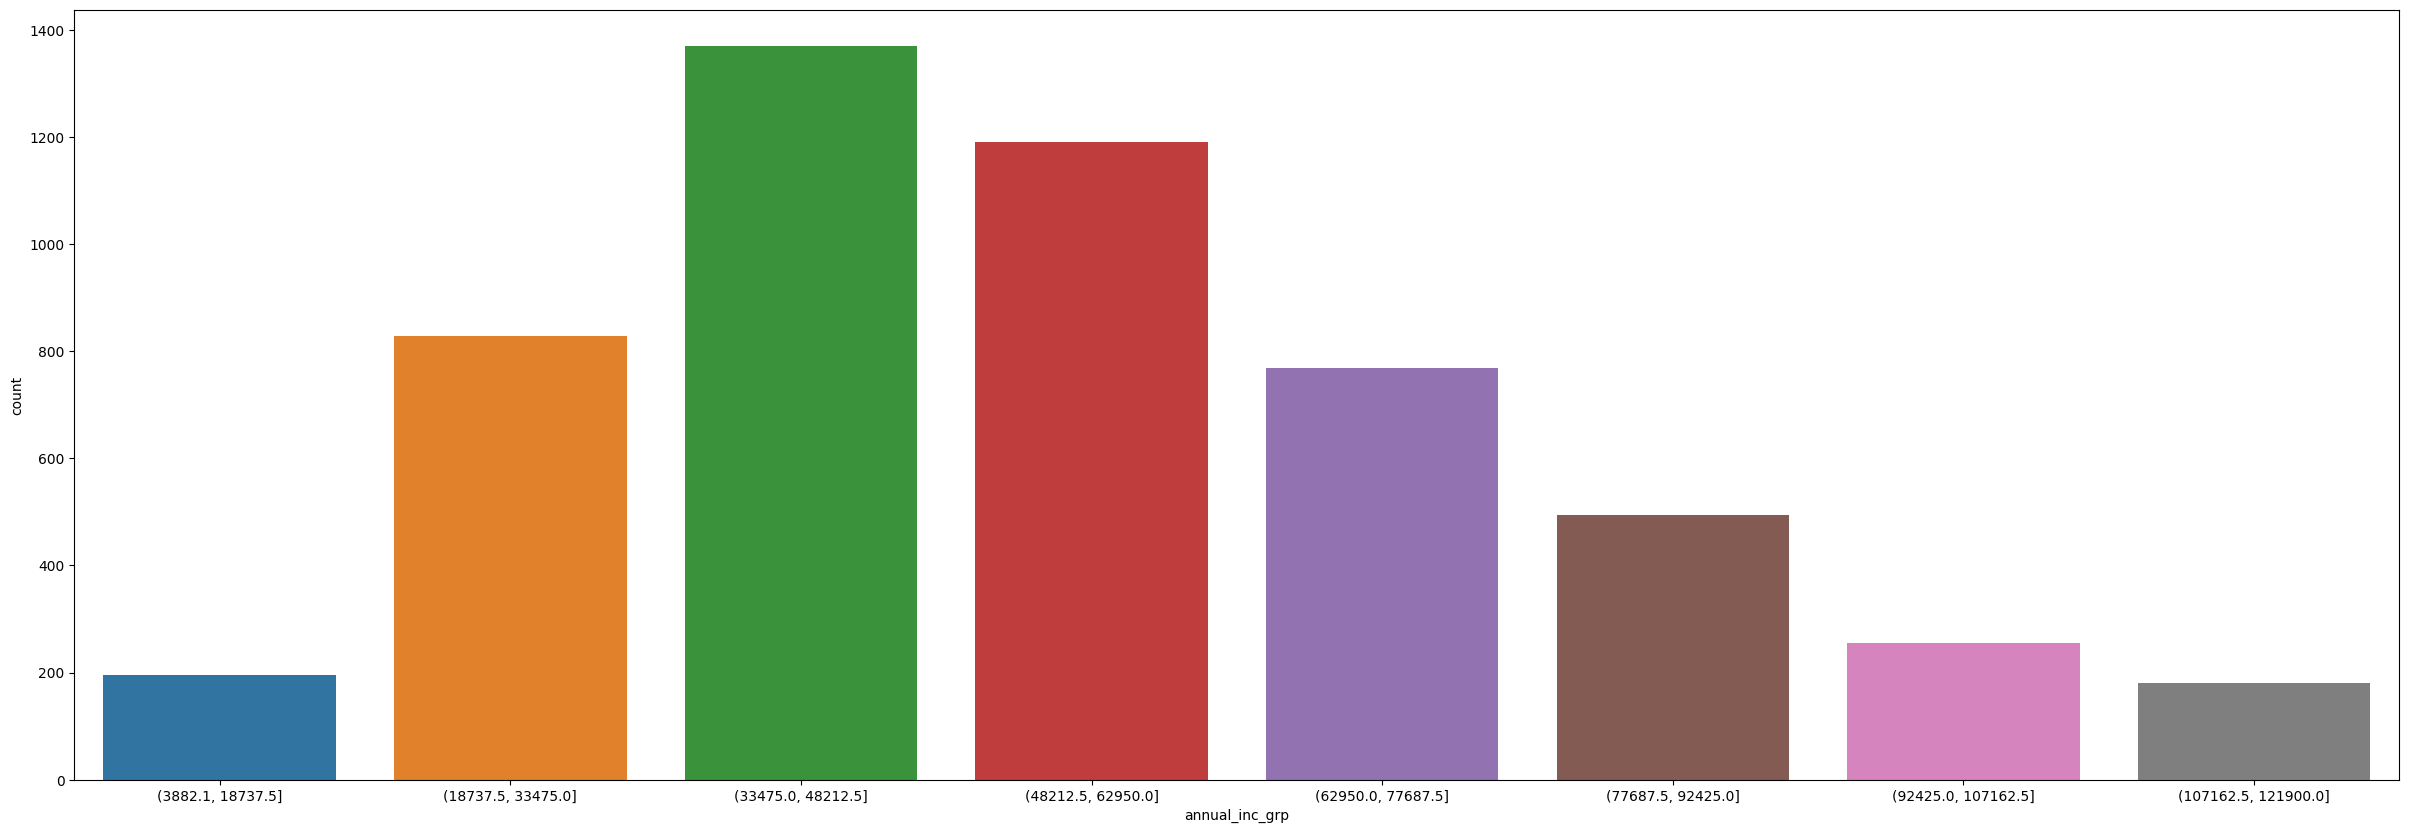

In [226]:
fig, ax = plt.subplots(figsize = (30,10))
sns.countplot(x='annual_inc_grp', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='int_rate_grp', ylabel='count'>

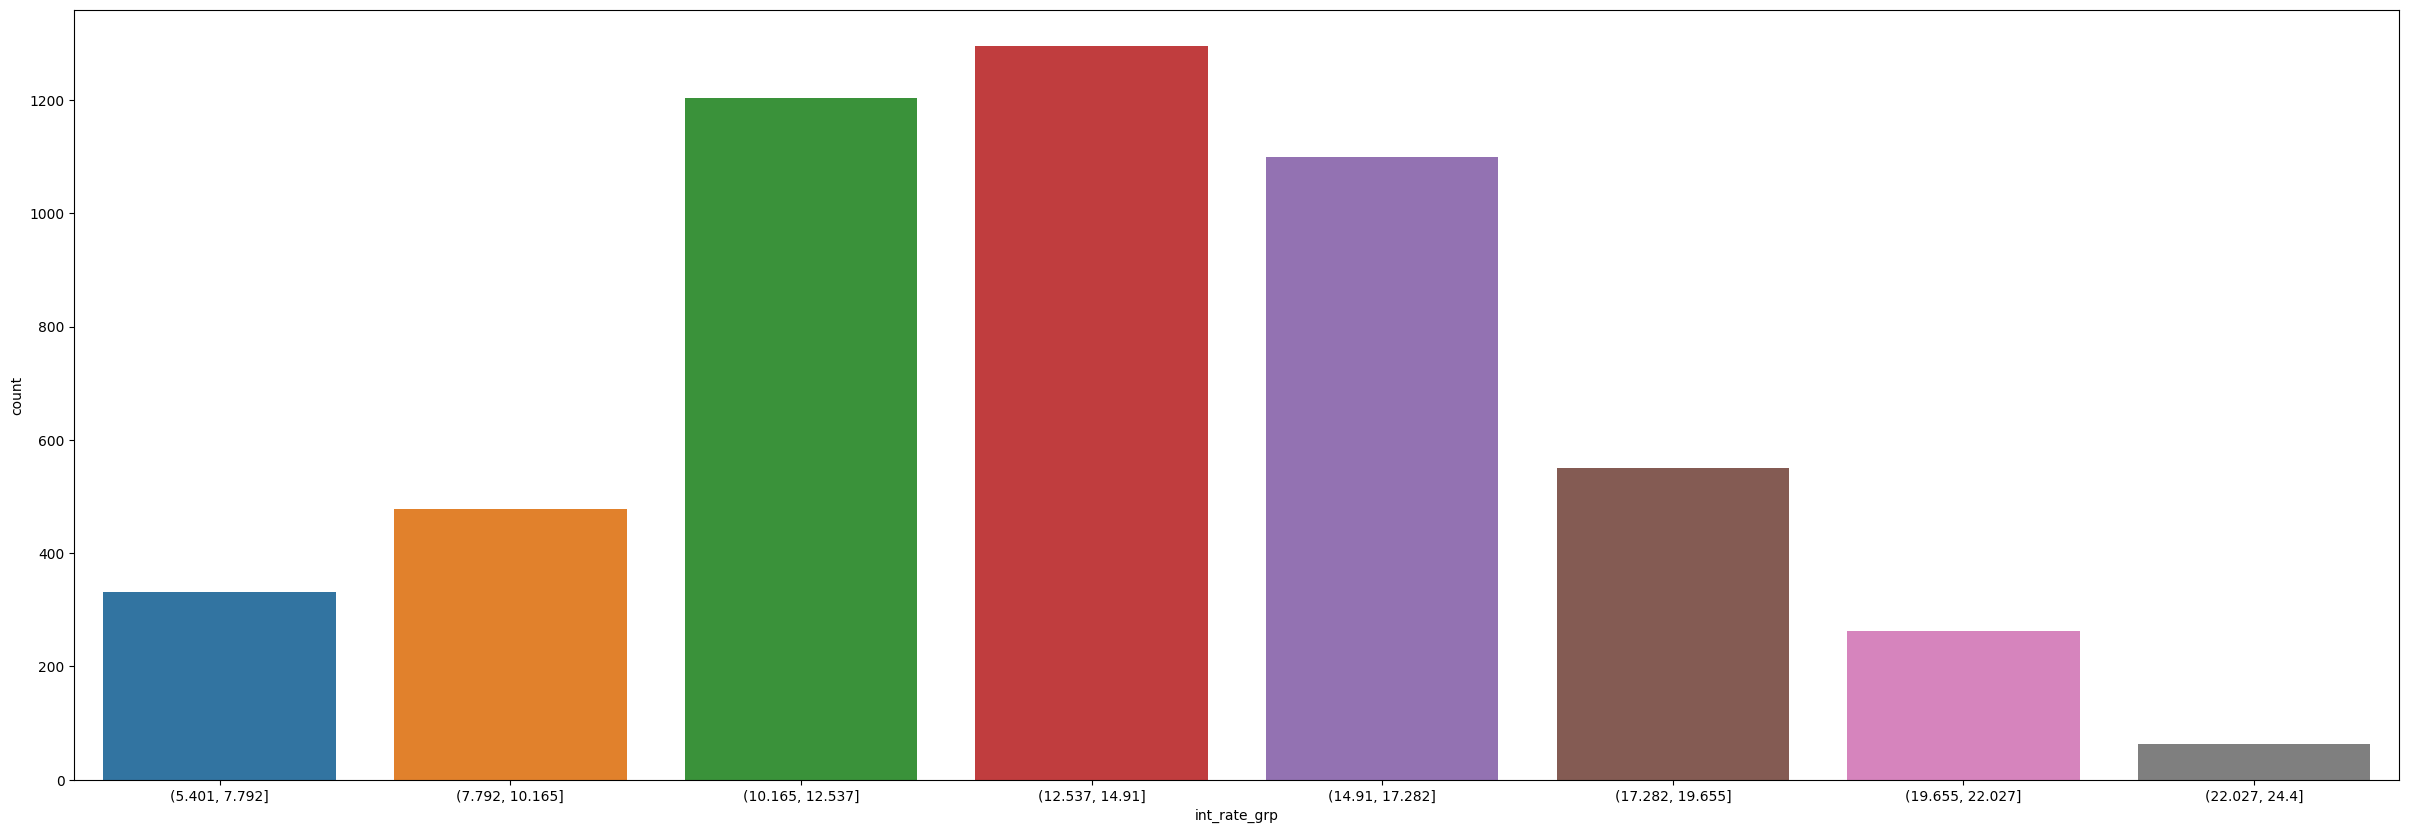

In [227]:
fig, ax = plt.subplots(figsize = (30,10))
sns.countplot(x='int_rate_grp', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='dti_grp', ylabel='count'>

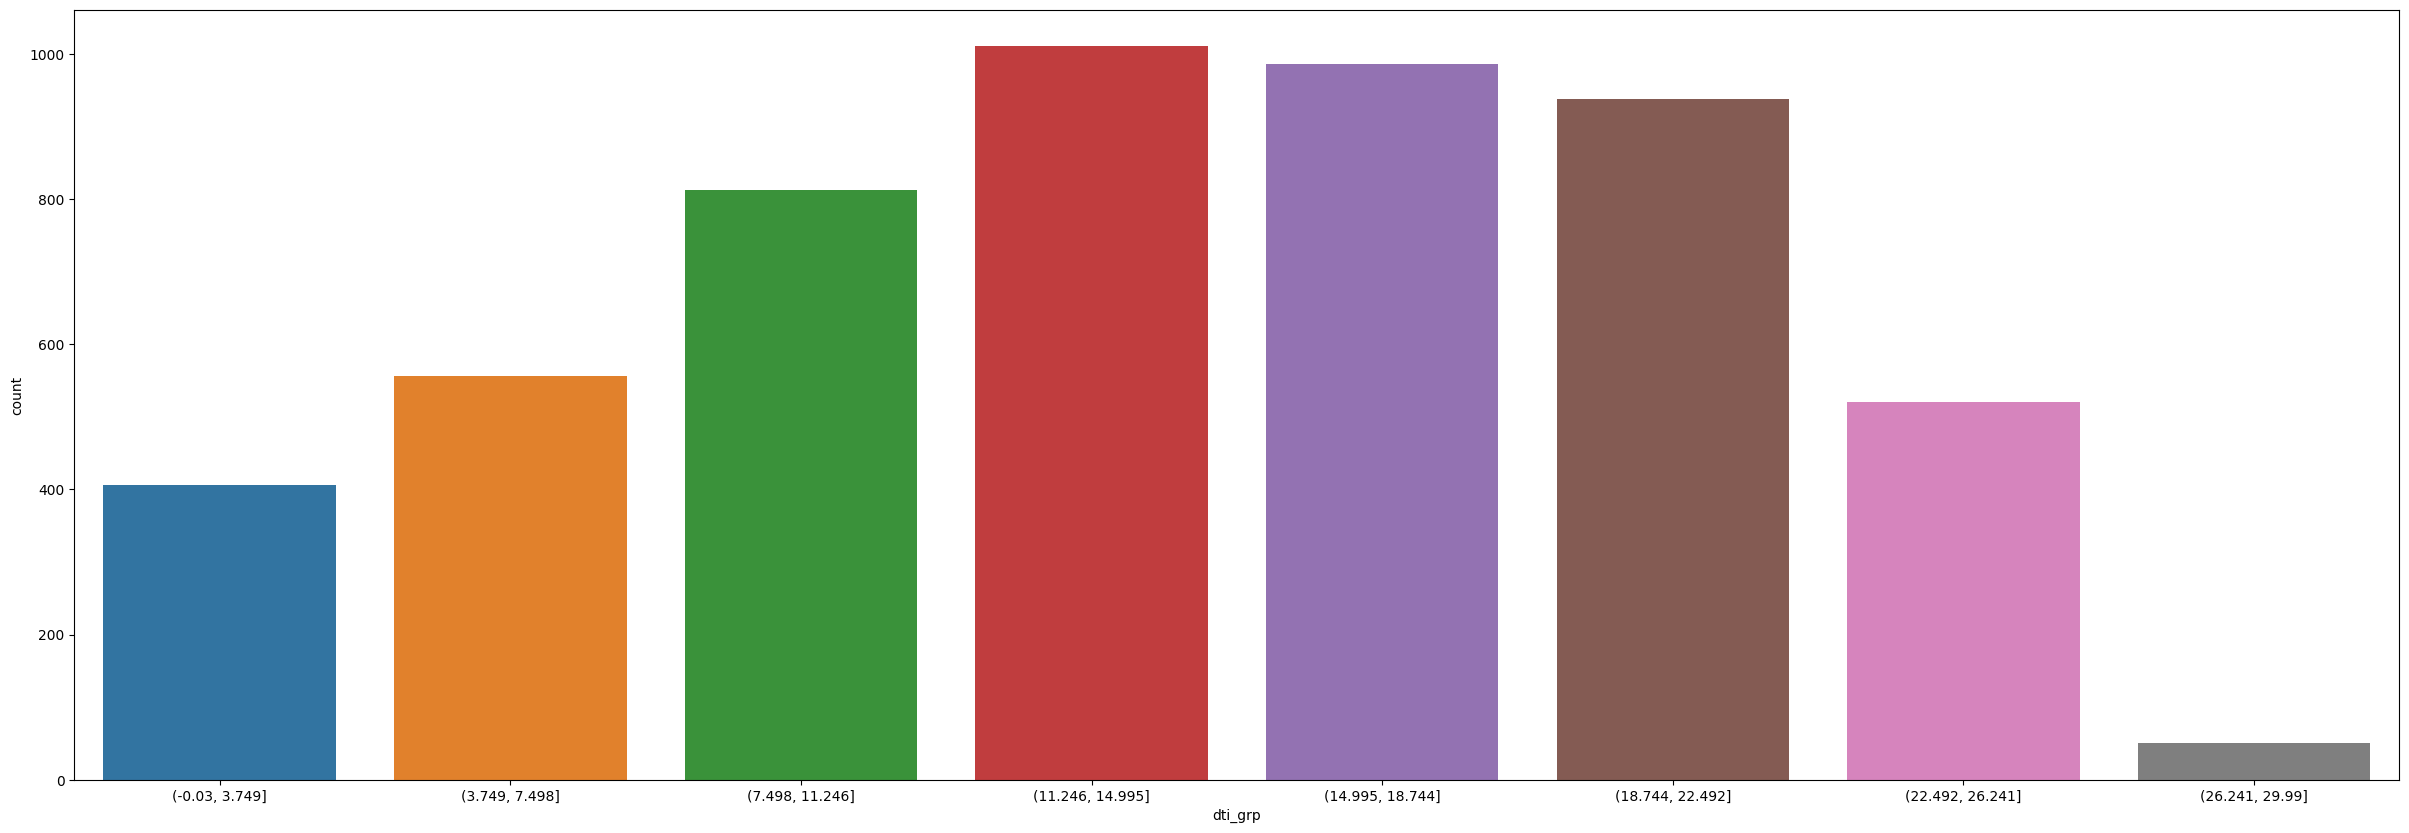

In [228]:
fig, ax = plt.subplots(figsize = (30,10))
sns.countplot(x='dti_grp', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

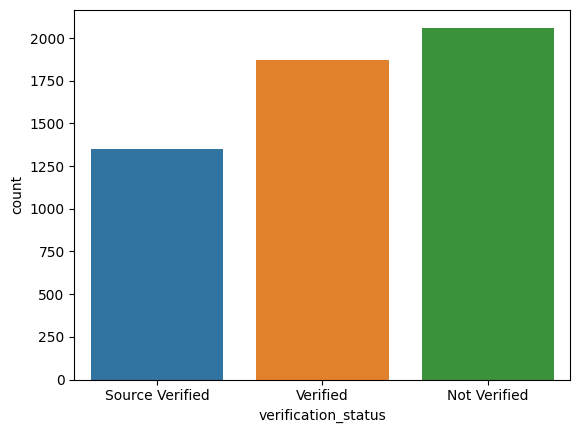

In [150]:
sns.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='term', ylabel='count'>

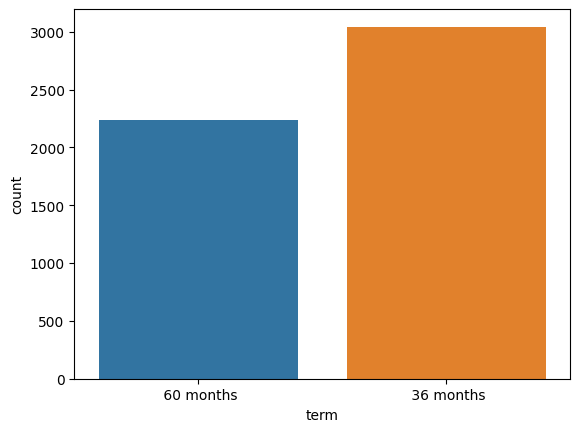

In [151]:
sns.countplot(x='term', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

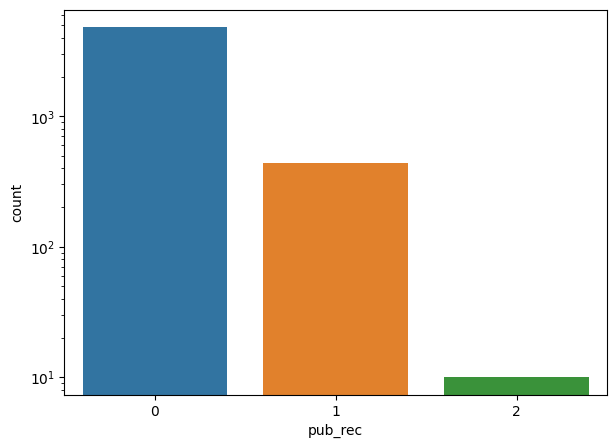

In [152]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_df[loan_df['loan_status']=='Charged Off'])

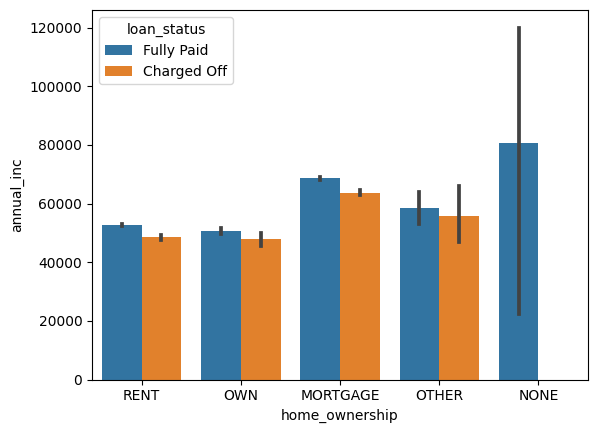

In [153]:
sns.barplot(x="home_ownership", y="annual_inc", hue="loan_status", data=loan_df)
# Show the plot
plt.show()

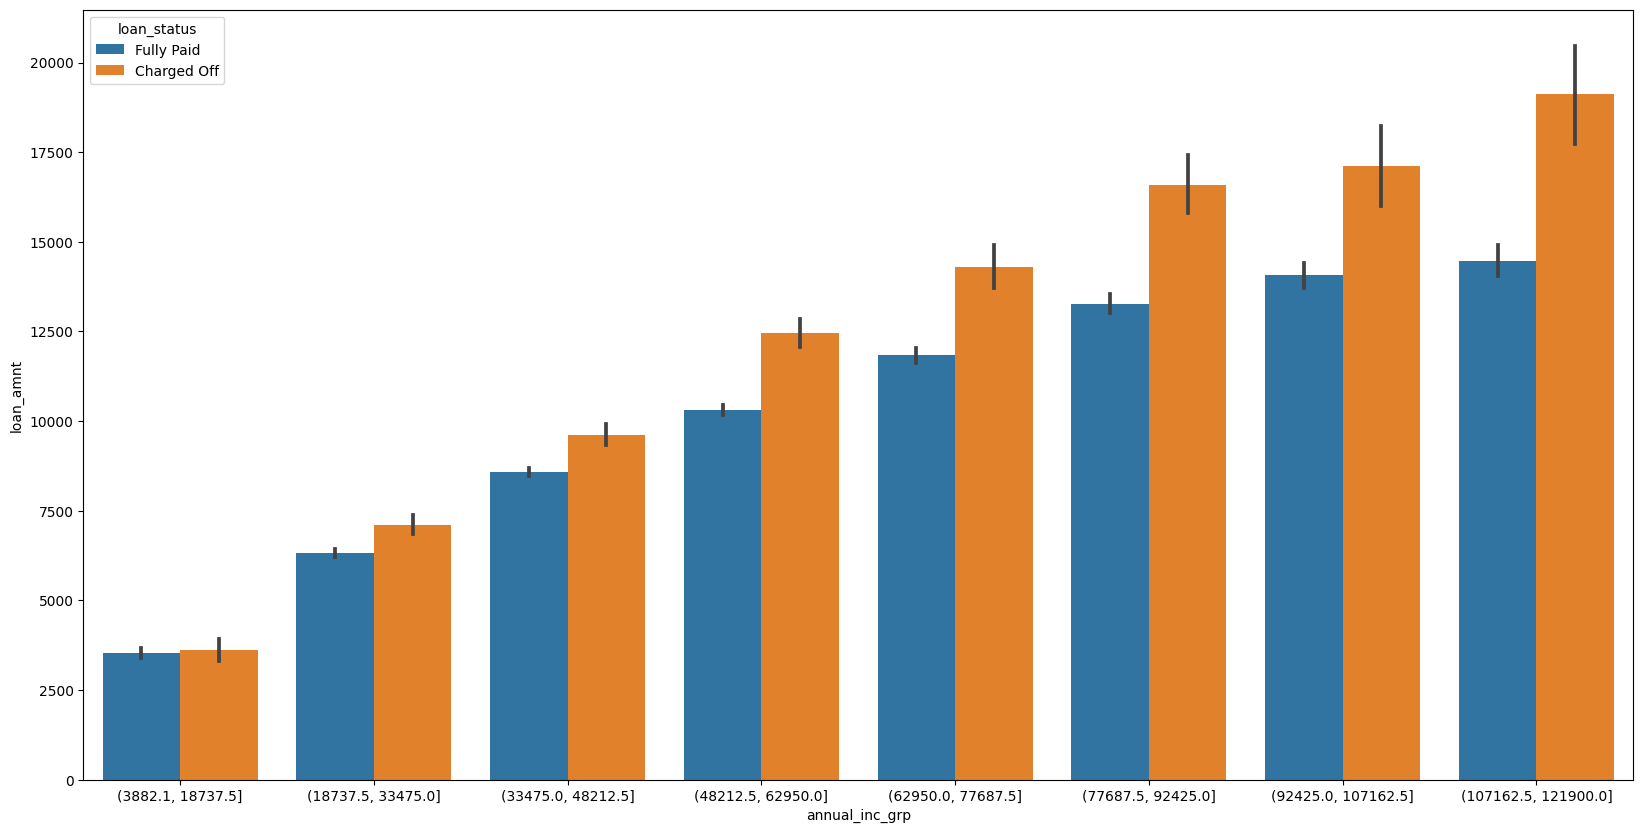

In [154]:
plt.figure(figsize=(20,10))
sns.barplot(x="annual_inc_grp", y="loan_amnt", hue="loan_status", data=loan_df)
# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

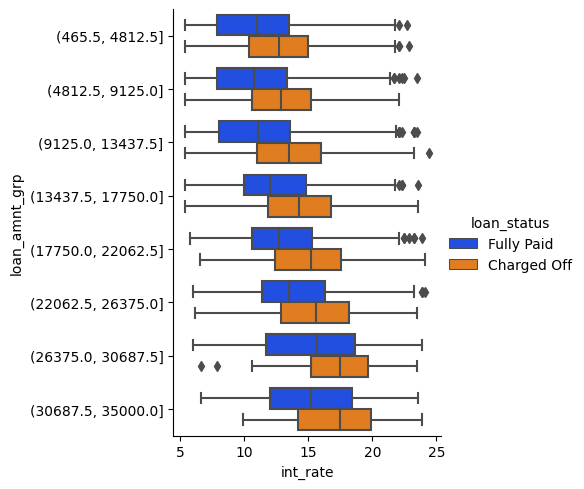

In [229]:
plt.tight_layout()
sns.catplot(data =loan_df,x ='int_rate', y ='loan_amnt_grp', hue ='loan_status',palette="bright",kind = 'box')

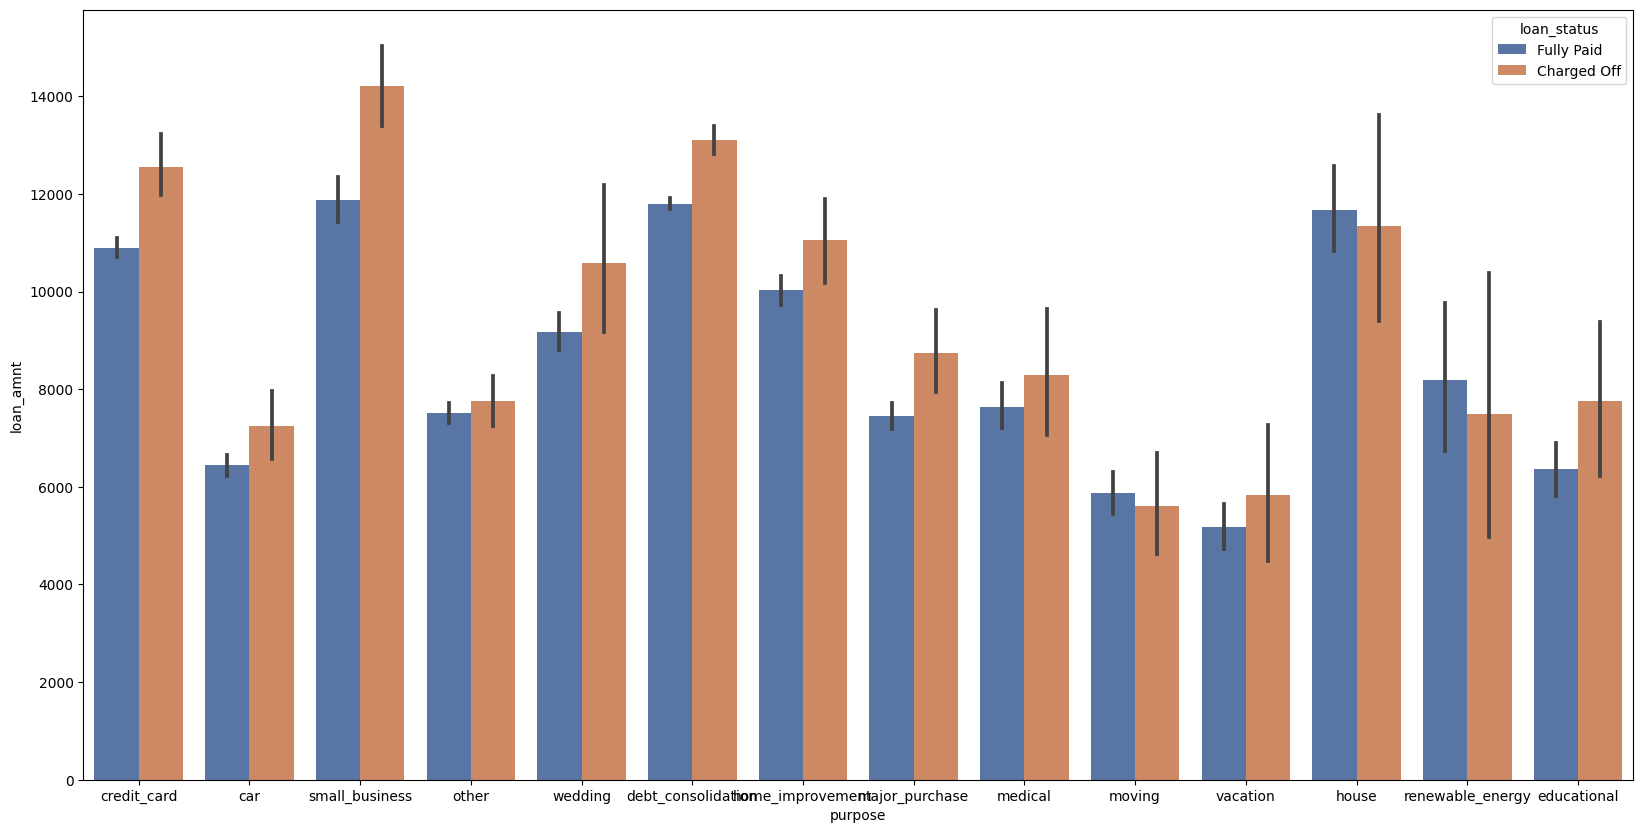

In [230]:
plt.figure(figsize=(20,10))
sns.barplot(data =loan_df,y='loan_amnt', x='purpose', hue ='loan_status',palette="deep")
plt.show()

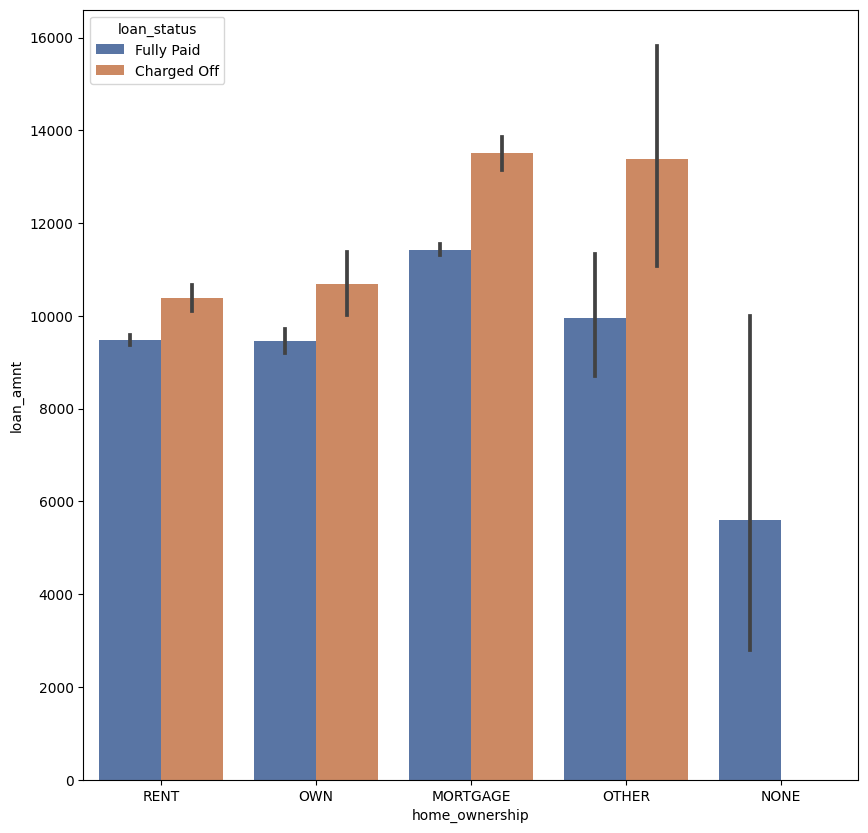

In [231]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df, x='home_ownership',y='loan_amnt', hue ='loan_status',palette="deep")
plt.show()

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

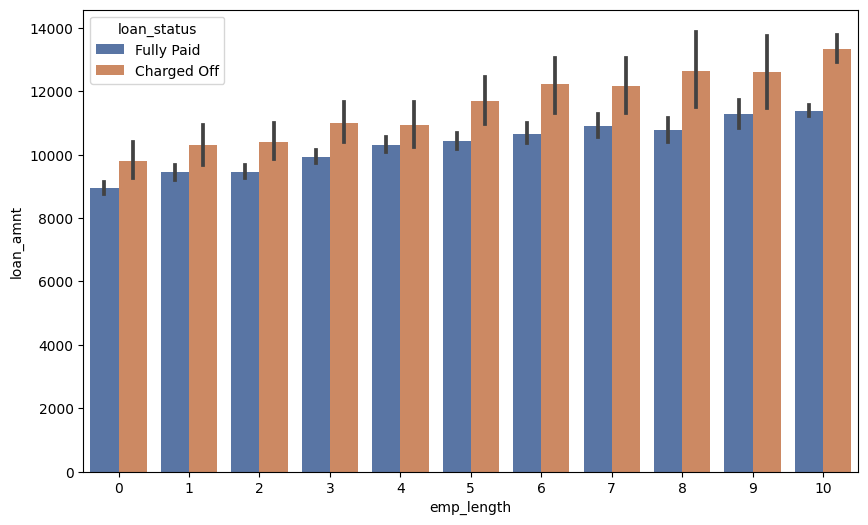

In [234]:
plt.figure(figsize=(10,6))
sns.barplot(data =loan_df,y='loan_amnt', x='emp_length', hue ='loan_status',palette="deep")

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

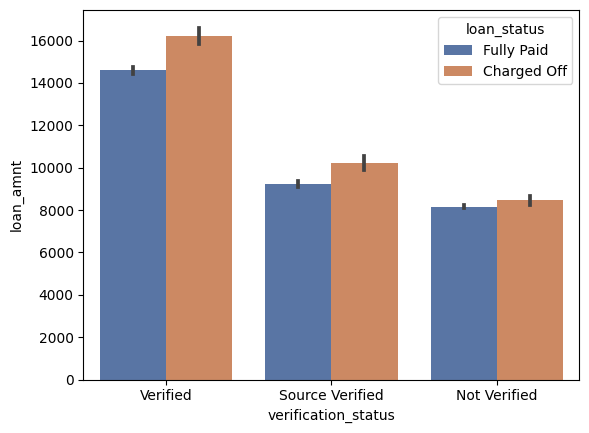

In [235]:
sns.barplot(data =loan_df,y='loan_amnt', x='verification_status', hue ='loan_status',palette="deep")

# Final Observation

1) Applicant whose home ownership status is "Own" tends to less deafult than "Rent" & "Mortgage"

2) Applicant who takes loan for "**Debt Consoildation**" purpose tends to **deafult** more than the other purposes

3) Appliacnt who takes loan in the month of "**Dec**" are more prone to **deafult** than others.

4) Applicant paid **higher interest rate** in all the loan amount group when loan status is **charged off**

5) Applicant with loan **amount group between 48K-91K** are more prone to **default** and same goes true for funded amount and funded amount investor group as well

6) Applicant with number of installment within range **176-338** tends to **chrged off** more

7) Applicant whose **annual income** group falls between **33K-63K** are more prone to **charged off** more than other

8) Applicant whose interest rate group falls between **10%-17%** are more prone to **charged off** more than other

9) Applicant whose DTI ratio falls between **11-22** are more prone to charged off than other

10) Applicant with verification status "not verfied" tends to default more

11) Applicant whose loan term is 36 month tends to default more

12) As employment lenght increses the requested loan amount also increses and so does the defaulter count
